In [2]:
from readability import *

d:\prive\School\Master\HvA\Tekst\project\class-2-team-8\project\src\readability_scores\readability.py:14: SyntaxWarning: invalid escape sequence '\s'
  starters = "(Hij\s|Zij\s|Het\s|Wij\s|Jullie\s|Zij\s|Hun\s|Onze\s|Maar\s|Echter\s|Dat\s|Dit\s|Waar\s|Omdat\s|Als\s|Wanneer\s)"
d:\prive\School\Master\HvA\Tekst\project\class-2-team-8\project\src\readability_scores\readability.py:40: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)


In [3]:
import re
alphabets= "([A-Za-z])"
prefixes = "(Dhr|Mevr|Dr|Prof)[.]"
suffixes = "(B.V|N.V|Jr|Sr|Co)"
starters = "(Hij\s|Zij\s|Het\s|Wij\s|Jullie\s|Zij\s|Hun\s|Onze\s|Maar\s|Echter\s|Dat\s|Dit\s|Waar\s|Omdat\s|Als\s|Wanneer\s)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](nl|be|com|net|org|io|gov|edu|me)"
digits = "([0-9])"
multiple_dots = r'\.{2,}'

def split_into_sentences2(text: str, lix=True) -> list[str]:
    """
    Split the text into sentences.

    If the text contains substrings "<prd>" or "<stop>", they would lead 
    to incorrect splitting because they are used as markers for splitting.

    :param text: text to be split into sentences
    :type text: str

    :return: list of sentences
    :rtype: list[str]
    """
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
    text = re.sub(multiple_dots, lambda match: "<prd>" * len(match.group(0)) + "<stop>", text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    if lix:
        text = text.replace(":",":<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = [s.strip() for s in sentences]
    if sentences and not sentences[-1]: sentences = sentences[:-1]
    return sentences

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Bart\AppData\Local\Temp\ipykernel_22616\645198094.py:5: SyntaxWarning: invalid escape sequence '\s'
  starters = "(Hij\s|Zij\s|Het\s|Wij\s|Jullie\s|Zij\s|Hun\s|Onze\s|Maar\s|Echter\s|Dat\s|Dit\s|Waar\s|Omdat\s|Als\s|Wanneer\s)"
C:\Users\Bart\AppData\Local\Temp\ipykernel_22616\645198094.py:31: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)


In [4]:
nrc1 = """De inauguratie op het scherm van de hele natie was niet genoeg voor het podiumdier Donald Trump. De hele eerste dag van zijn tweede presidentschap wilde hij blaken in het volle licht van de schijnwerpers. Zich laten toejuichen. En de wereld te verstaan geven dat álles vanaf nu anders zal zijn. „Kan je je voorstellen dat Biden dit zou doen”, riep hij maandagavond vanachter een klein houten bureautje dat voor hem was klaargezet in het indoorsportstadion in Washington. Daar, in plaats van in het Witte Huis, tekende hij voor 20.000 fans zijn eerste 8 van 41 decreten.

De aanbrekende ‘Gouden Eeuw’, die hij tijdens zijn toespraak had afgekondigd, begon met het terugtrekken uit het klimaatakkoord van Parijs en een bevel dat federale ambtenaren niet meer thuis mogen werken. Nadat hij wat stram uit zijn rode stoel was gekomen, gooide hij de acht zwarte stiften waarmee hij zijn handtekening had gezet in het publiek. Aanhangers doken erop alsof een stripper ze net haar ondergoed had toegeworpen.

Zo bood Trump zijn aanhangers waarvoor ze, de kou trotserend, naar Washington waren gekomen: vermaak, grootspraak en de afbraak van alles wat zijn vermeende vijanden lief is. In zijn inzegeningsspeech had hij hun beloofd dat hij het Panamakanaal zou „terugnemen” en de Amerikaanse vlag op Mars zou planten. Trump is van plan ongehinderd zijn gang te gaan in binnen- en buitenland. Hij bepleit imperialisme tot voorbij de eigen planeet. „Niets zal ons in de weg staan, omdat we Amerikanen zijn.”
Capitoolbestormers

Het tweede internationale ‘obstakel’ dat hij na ‘Parijs’ uit de weg ruimde, was de Wereldgezondheidsorganisatie. Trump trok de VS daar later op maandagavond uit terug. In 2021 had Biden Trumps besluit daartoe teruggedraaid voordat het in werking trad. Ook verklaarde Trump maandag de internationale belastingdeal ongeldig die Biden had gesloten om bedrijven minimaal 15 procent belasting te laten betalen.

Zijn meest radicale aanhangers beloonde Trump door zijn belofte na te komen dat hij op dag één de Capitoolbestormers zou vrijlaten. Hij verleende maandag gratie aan zo’n 1.500 veroordeelden en verdachten voor de aanval op het hart van de Amerikaanse democratie in 2021. Meerdere agenten en aanhangers kwamen daardoor om het leven.

Enrique Tarrio, de oud-leider van de Proud Boys-militie, die met 22 jaar de allerhoogste gevangenisstraf kreeg voor opruiende samenzwering, werd onmiddellijk met gratie vrijgelaten uit de gevangenis in Louisiana. De extreemrechtse Proud Boys wapperden maandag alweer met hun vlaggen in Washington.

Stewart Rhodes, de leider van de Oath Keepers, die 18 jaar celstraf uitzit, komt ook op vrije voeten, maar door een drastische strafverlaging in plaats van gratie. Daardoor behoudt hij zijn strafblad. Geen van beiden drong op 6 januari 2021 het Capitool binnen, maar ze werden schuldig bevonden aan het voorbereiden van de bestorming.

Met het vrijlaten van vrijwel alle daders van 6 januari toont Trump dat hij niet alleen spuugt op internationale afspraken en organisaties, maar ook op politieagenten en rechters die Amerikaanse wetten handhaven. Plus de politici wier leven tijdens de bestorming bedreigd werd. Elke vriend van zijn vijand – Joe Biden, in dit geval – is zijn vijand. En andersom.
Grondwetswijziging

In het Witte Huis lanceerde Trump verschillende decreten rond zijn andere belangrijke campagnebeloftes, al hebben die niet allemaal onmiddellijk effect. Trump riep een ‘energienoodtoestand’ uit om het boren naar fossiele brandstof makkelijker te maken. Ook tekende hij ‘het beschermen van het Amerikaanse volk tegen invasie’, om het vastzetten en uitzetten van illegaal binnengekomen migranten te vergemakkelijken. Zijn ‘grenstsaar’ Tom Homan had deze week al „razzia’s” aangekondigd. Trump wil ook alle beleid ten faveure van trans- en nonbinaire personen terugdraaien, tot en met het geslacht in hun paspoort.

Trumps decreet om een einde te maken aan het geboorterecht op burgerschap, het grondrecht dat een ieder die op Amerikaanse grond geboren wordt de nationaliteit krijgt, is symbolisch. De president heeft veel macht, maar kan niet eigenhandig de grondwet wijzigen. Het decreet dat al zijn ministeries maatregelen moeten nemen om de kosten voor levensonderhoud van burgers terug te dringen, is niet concreter dan dat regelgeving en administratielast moeten worden geschrapt.

Op andere voor hem cruciale dossiers liep Trump minder hard van stapel. De importheffingen die hij andere landen wil opleggen, komen er niet onmiddellijk, omdat ze ook de VS kunnen schaden. „We zijn er nog niet klaar voor”, zei hij in het Witte Huis tegen journalisten.

Met het uitstel of afstel van het verbod op TikTok draaide Trump zelfs 180 graden van zijn eerdere standpunt dat de Chinese app verbannen moest worden.
Stortvloed

In zijn eerste presidentscampagne in 2016 noemde Trump Barack Obama een zwakke president vanwege het uitvaardigen van decreten die het Congres omzeilen. Als president kwam hij snel terug van zijn uitspraak dat hij „grotendeels af wil” van dergelijke eenzijdige besluiten. De stortvloed aan decreten die hij maandag losliet, bewijzen dat het inmiddels zijn favoriete middel is, ook wanneer de Republikeinen een meerderheid hebben in zowel Senaat als Huis van Afgevaardigden.

Maandagavond zou Trump met first lady Melania drie gala’s bezoeken die in Washington voor hem georganiseerd zijn. Daar verschijnen en een dansje doen zou al voldoende zijn om die taak te vervullen. Maar Trump is van plan op alle drie de evenementen opnieuw een toespraak te houden.

Trump kan geen genoeg krijgen van zijn comeback en bewieroking. Maar hij is geen stripper die alleen aandacht grijpt met schaamteloosheid. Hij wil een bokser zijn, een vechter, die al zijn tegenstanders met rake klappen knock-out slaat. Met de drastische maatregelen voor alle facetten van de samenleving heeft hij zijn opponenten op z’n minst duizelig gekregen.
"""
# url: https://www.nrc.nl/nieuws/2025/01/21/trump-is-terug-met-een-stortvloed-aan-radicale-decreten-a4880288 

In [5]:
#analyse
print(f'lix score: {lix(nrc1):.4f}')
print(f'flesch score: {flesch_douma(nrc1):.4f}')

lix score: 37.9086
flesch score: 38.0540


In [6]:
nrc2 = """
Deze week krijgt de rechtszaak een vervolg en wie weet volgt met de uitspraak ook de ontknoping. Dinsdag begint de inhoudelijke behandeling van de zaak van prins Harry, de jongste zoon van koning Charles, tegen News Group Newspapers (NGN), een uitgeverij in handen van Rupert Murdoch. NGN is de uitgever van tabloidkrant The Sun en voorheen van News of the World. Die laatste titel werd in 2011 opgedoekt, vanwege de afluisterpraktijken die hun journalisten erop na hielden. Drie vragen over de zaak.
Waar gaat deze zaak over, als News of the World al zo lang niet meer bestaat?

Prins Harry beschuldigt niet alleen News of the World, maar ook The Sun ervan dat journalisten daar de wet overtraden om aan informatie over hem te komen, iets wat Rupert Murdoch en anderen bij NGN altijd hebben ontkend. Zij houden vol dat de afluisterpraktijken alleen bij News of the World voorkwamen. Daarvoor bood Murdoch in 2011 excuses aan en de krant werd opgeheven als gevolg van het schandaal. NGN heeft sindsdien honderden miljoenen aan schadevergoedingen betaald aan ongeveer 1.300 slachtoffers.

Harry wil bij de rechter bewijzen dat ook The Sun tussen 1996 en 2011 de wet heeft overtreden en dat hij daar slachtoffer van was. Journalisten en detectives zouden telefoons hebben afgeluisterd, maar ook vuilnis hebben doorzocht en geprobeerd om door bluffen tegen bronnen informatie los te krijgen. Tijdens de zittingen komen zo’n dertig artikelen aan de orde waarbij dit soort dingen zou zijn gebeurd. In aanloop besloot de rechtbank ook dat sommige van zijn claims niet worden behandeld, vanwege gebrek aan bewijs. Bijvoorbeeld voor het plaatsen van afluisterapparatuur in kamers en volgapparatuur in auto’s.
Prins Harry won toch al eens een rechtszaak tegen de roddelpers?

Dat ging om een rechtszaak die hij tegen Mirror Group Newspapers (MGN) had aangespannen, uitgever van onder andere de Daily Mirror en Sunday Mirror. In december 2023 bepaalde de rechtbank in Londen dat MGN inderdaad schuldig was aan het illegaal vergaren van informatie, dat het inbreken op telefoons en voicemails een „wijdverbreide” praktijk voor hen was en dat ook managers hoog in de organisatie hiervan af wisten. Harry kreeg een schadevergoeding toegekend van 140.600 pond, omgerekend ongeveer 166.000 euro. Bij de huidige zaak is Harry vooral uit op publieke erkenning van aansprakelijkheid door NGN.

Die zaak tegen MGN werd overigens behandeld door dezelfde rechter als nu, Timothy Fancourt. Dit betekent niet automatisch goed nieuws voor Harry. In aanloop naar de zittingen deze week stelde Fancourt in voorlopige bevindingen vast dat deze zaak te veel capaciteit van de rechterlijke macht vraagt, doordat de twee partijen elke stap in het proces onderling betwisten. De vete heeft trekken van een „ingegraven front tussen twee koppige, maar goed uitgeruste legers”, schreef Fancourt. De zittingen duren naar schatting acht tot tien weken.
Waarom haakten die andere beroemdheden af?

De tientallen bekende Britten die ooit hierbij waren aangesloten, troffen bijna allemaal een schikking. Acteur Hugh Grant maakte bijvoorbeeld vorig jaar bekend dat NGN hem „een enorm hoog bedrag” aangeboden had. Grant wilde niet schikken, schreef hij in een verklaring, maar volgens de Britse regels rond civiele procedures zou hij waarschijnlijk opdraaien voor de juridische kosten van beide partijen, ook als de rechter hem wel in het gelijk stelde maar de schadevergoeding lager zou zijn dan het schikkingsaanbod van NGN. „Zelfs als elke beschuldiging bewezen wordt geacht, zou ik nog steeds aansprakelijk zijn voor rond de 10 miljoen pond aan kosten”, schreef Grant.

Harry loopt dat grote financiële risico ook, maar hij zou die kosten over hebben voor een gerechtelijke uitspraak waarin de wanpraktijken bewezen worden geacht. Volgens documenten die Harry in de rechtszaak aanleverde, heeft zelfs zijn eigen broer, kroonprins William, in het geheim besloten te schikken met The Sun, al is dat nooit officieel bevestigd. Harry’s weerzin tegen de roddelpers vindt zijn oorsprong in de dood van zijn moeder Diana, die achternagezeten door paparazzi om het leven kwam.

Naast Harry is nu nog één mede-eiser over, dat is Tom Watson, voormalig plaatsvervangend leider van de Labour-partij, die NGN van dezelfde illegale praktijken beticht. Harry, die in Californië in de Verenigde Staten woont, komt naar verwachting minstens twee dagen naar de rechtbank om te getuigen. Hij is van plan om allerlei bekende Britten op te roepen als getuige, onder meer oud-premier Gordon Brown en zangeres Lily Allen.
"""
# url: https://www.nrc.nl/nieuws/2025/01/20/prins-harry-voert-een-strijd-van-de-lange-adem-tegen-de-britse-tabloids-en-die-komt-met-deze-rechtszaak-tot-een-climax-a4880178 

In [7]:
#achtergrond
print(f'lix score: {lix(nrc2):.4f}')
print(f'flesch score: {flesch_douma(nrc2):.4f}')

lix score: 31.3521
flesch score: 41.2935


In [8]:
nrc3 = """
De tweede inauguratie van Donald Trump had de dag moeten zijn dat zijn kiezers Washington overnamen. Dat een massa ‘Make-America-Great-Again’– petjes het park voor het Capitool rood zou kleuren. Maar als Trumps toespraak maandag iets na 12 uur ’s middags plaatselijke tijd begint, staan er slechts een paar honderd fans, op honderden meters van het parlementsgebouw. Allemaal met hun nekken gebogen als verwelkte bloemen, gekluisterd aan hun telefoonscherm. De petjes zijn vervangen door warme mutsen. De hoofdstad kleurt wit van de sneeuw.

Debby McCoy (57) heeft zondagnacht in haar auto geslapen, „om bij dit historische moment te zijn”. Maar ze was er net als de meeste Trumpfans niet in geslaagd om hem zondagavond te zien spreken in een basketbalstadion. „De rij was eindeloos.” En ze vangt ook deze dag geen glimp van hem op. De inauguratie vindt binnen plaats in heel besloten gezelschap. Zijn gewone kiezers staan in de kou.

Het is -7 graden Celsius in Washington: bevroren-tenen-koud met een lipbarstende wind en knieontwrichtende gladheid. Geen weer om lang buiten te zijn, ondanks de heldere lucht en de zonneschijn. Nog tijdens de toespraak vindt McCoy, gewikkeld in een dikke witte sjaal, het mooi geweest en schuifelt ze richting de horeca. Onderweg schreeuwt ze tegen een nondescript kantoorgebouw van de federale overheid. „Bureaucraten, maak dat jullie wegkomen. You’re fired! Hij is terug – met wraak.”

Trump is terug. En hoe. In zijn eerste rede als president schetste hij een donker beeld van het huidige Amerika. „Mijn verkiezing is een mandaat om het verraad dat hebben plaatsgevonden volledig en totaal terug te draaien en mensen hun geloof, hun rijkdom, hun democratie en hun vrijheid terug te geven. Vanaf dit moment is de neergang van Amerika voorbij.”

Al tijdens zijn speech stuurt het Witte Huis een lijst met decreten rond die hij dezelfde dag zal ondertekenen. Deze zijn vooral gericht op het uitzetten van illegaal binnengekomen immigranten, het terugdraaien van klimaatmaatregelen en een offensief tegen „radicale genderideologie”.

En Trump staat dit keer niet alleen. In 2016 was zijn winst een – voor velen onaangename – verrassing en hield het Republikeinse establishment hem op afstand wanneer hij niet direct diens agenda van lage belastingen en conservatieve rechtersbenoemingen diende. In 2021 vertrok hij als een paria: verliezer van de verkiezingen en veroorzaker van de bestorming van het Capitool waar hij nu wordt beëdigd. Nu is hij herrezen met een veel overtuigender verkiezingszege, maar vooral een gedienstige Republikeinse Partij en politieke en financiële steun van belangrijke techmiljardairs die aan de knoppen van de publieke opinie zitten.

Die entourage viert dagenlang feest in Washington. De beste hotels kosten zeker duizend dollar per nacht. Villa’s, restaurants en balzalen zijn afgehuurd voor besloten feesten. Trumps kabinet telt meer miljardairs dan ooit. Makelaars melden een tekort in het absolute luxesegment van de woningmarkt nu die naar de hoofdstad verhuizen.

McCoy haalt haar schouders op over het verschil tussen de inauguratie-ervaring van de mensen die Trump financieel steunen en de kiezers die hem aan de macht hielpen. „Ja, ik ben teleurgesteld dat de ceremonie niet buiten is en we allemaal kunnen samenkomen. Maar dan had ik helemaal achteraan gestaan in plaats van hier met zicht op het Capitool”, zegt ze. „En dan hadden ze ons gewone mensen ook heus niet binnengelaten op hun sjieke feestjes.”

Washington is en blijft een ‘blauwe’ stad: 90 procent van de inwoners stemde in november op Kamala Harris. Sommige Trumphaters hebben afgesproken de dag van de inauguratie volledig in het zwart gekleed door te brengen. Maar er is nauwelijks sprake van protest tegen of frictie met het Trumpleger dat in de hoofdstad is neergestreken. Waar Democratische kiezers in 2017 verdrietig afscheid namen van Barack Obama, is er weinig rouw dat Joe Biden het Witte Huis verlaat. Het helpt zijn populariteit niet dat zijn laatste daad op weg naar de uitgang het beschermen van zijn eigen familie tegen mogelijke vervolging door Trumps ministerie van Justitie was.

„Ga je echt met die pet de straat op. Dit is DC”, zei Alex Kinsey (23) uit St. Louis toen hij en Josh Walgreen (23) uit Chicago ’s ochtends hun hotel verlieten. „Maar we hebben geen problemen gehad”, zegt Walgreen, die ondanks de kou een dun jasje aanheeft en zijn rode MAGA-pet draagt. „Ik ben blij dat iedereen normaal met elkaar omgaat. Op sociale media wordt onenigheid altijd uitvergroot, maar nu we hier zijn, valt het erg mee.”

Zelfs hun hotelkosten zijn te doen. Misschien omdat mensen die vrijdag hoorden dat de inzegeningsceremonie verplaatst was hadden geannuleerd, konden ze een hotel in de buurt van het Witte Huis krijgen voor iets meer dan 300 dollar per nacht. Maar ze zien teleurstellend weinig van de Republikeinse festiviteiten. Zondag stonden ze acht-en-een-half uur tevergeefs in de rij om een Trump-evenement bij te wonen, dus doen ze deze dag niet eens een poging.

Na alle ceremonies moet Trump opschieten met zijn beleid, vindt Walgreen. „Want er is overal zo’n onvrede dat de Democraten binnen twee jaar alweer de tussentijdse verkiezingen kunnen winnen. Dan is ons feest weer voorbij.”
"""
# url: https://www.nrc.nl/nieuws/2025/01/20/blauwbekkende-trump-kiezers-hij-is-terug-met-wraak-a4880263 

In [9]:
#rapportage
print(f'lix score: {lix(nrc3):.4f}')
print(f'flesch score: {flesch_douma(nrc3):.4f}')

lix score: 50.5905
flesch score: 47.4689


In [10]:
volkskrant1 = """
Acht jaar geleden sprak Donald Trump in zijn inauguratiespeech van een ‘Amerikaans bloedbad’ en schetste hij een gitzwart beeld van de Verenigde Staten, waar ontmantelde fabrieken als ‘grafstenen’ in het landschap zouden staan. Trumps tweede inaugurele rede zou iets optimistischer van toon zijn, vermoedden veel Amerikaanse journalisten van tevoren. Trump was immers ervarener, zijn verkiezingswinst ruimer en hij maakte de afgelopen weken een opgewekte indruk.Die verwachting kwam niet uit. Amerikaanse media constateren in de eerste analyses van Trumps rede ‘dezelfde donkere thema’s als in 2017’, zoals de Washington Post schrijft. Volgens de New York Times schilderde Trump zelfs ‘een nog somberder portret van een land in wanorde, aangetast is door jaren onder een corrupte, radicale, gevestigde orde’ om daaraan toe te voegen dat de door de nieuwe president geschilderde toestand met de werkelijkheid weinig te maken heeft.
Goddelijke interventie

Ook Trumps zelfenscenering als ‘nationale redder’, zoals de Los Angeles Times schreef, herinnert aan de eerste keer dat hij de presidentiële eed zwoer. ‘Herhaaldelijk presenteerde Trump zichzelf als een unieke figuur in de Amerikaanse geschiedenis, iemand die door God aangewezen was’, aldus de Washington Post naar aanleiding van Trumps verwijzingen naar de verijdelde aanslag op zijn leven bij een campagne-optreden vorige zomer. ‘Hij lijkt zijn terugkeer naar het Witte Huis inderdaad als een goddelijke interventie te beschouwen’, constateert de New York Times.
Volgens Al Jazeera maakt de Trump van 2025 een nog zelfverzekerder indruk dan die van 2017. Nieuw - tenminste vergeleken met Trumps eerste termijn - zijn ook de expliciet expansionistische plannen voor het ‘terugveroveren’ van het Panamakanaal en het veranderen van de naam van de Golf van Mexico in de Golf van Amerika. ‘Een agressieve agenda’, kopt CNN. En The Wall Street Journal schrijft over ‘een agressief nieuw hoofdstuk in de America-First beweging.’

Trumps toon, zo valt media in binnen- en buitenland op, is daarentegen juist terughoudender en wat matter dan toen hij voor het eerst het Witte Huis betrok. Volgens de New York Times lijkt de president tijdens zijn verhaal soms te denken dit hij allemaal al zo vaak heeft uitgelegd Of, zoals journalisten van de BBC constateren in een nieuwspodcast: ‘Het was wel een beetje low energy.’

Maar ligt dat aan hem? Of ligt het aan ons, de burgers en nieuwsconsumenten, vraagt USA Today zich af, insinuerend dat iedereen onherroepelijk gewend is geraakt aan Trump zijn uitspraken en stijl. ‘Donald Trump is dezelfde, maar Washington en de wereld zijn veranderd.’

Na bijna een half uur praten, probeert Trump zijn verhaal toch nog een positieve wending te geven. Onder andere door, door hem ingeleide, ‘een nieuwe gouden eeuw’ aan te kondigen. ‘Misschien bedoelt hij een nieuwe ‘Gilded Age’, schrijft The Atlantic, doelend op de door schrijver Mark Twain bedachte benaming voor de periode in de late negentiende eeuw.

Door de nauwe banden tussen politici en grootindustriëlen, waren de VS destijds zowel bijzonder rijk als zeer corrupt. Verschillende media merken terloops op dat het inmiddels een beetje merkwaardig wordt dat Trump tekeergaat tegen ‘de gevestigde orde’, terwijl hij zich omringd weet door alle grote, en zeer gevestigde techbazen.

In de kern is Trumps visie op zijn land ‘bombastisch en tegenstrijdig’, constateert The Guardian, doelend op Trumps streven om een vredestichter te zijn, maar ook het Panama-kanaal terug te veroveren. Overigens valt het vooral Europese media op dat er drie grote afwezige thema’s zijn in Trumps verhaal, waarin buitenlandse politiek relatief een grote rol speelt: Oekraïne, Europa en de Navo.

De enige die maandagavond over democratie en rechtsstaat sprak, was Senator Amy Klobuchar, de Democratische voorzitter van de samenwerkingscommissie van de twee politieke partijen in het Congres. Klobuchar, zo schrijft de Süddeutsche Zeitung, herinnerde de toehoorders eraan dat niet de Amerikaanse president de soeverein is, maar de stemgerechtigde bevolking van de Verenigde Staten.
"""
# url: https://www.volkskrant.nl/buitenland/media-trump-schildert-somber-portret-van-land-in-wanorde-en-kondigt-agressieve-agenda-aan~bc4516d5/ 

In [11]:
#nieuws
print(f'lix score: {lix(volkskrant1):.4f}')
print(f'flesch score: {flesch_douma(volkskrant1):.4f}')

lix score: 23.3805
flesch score: 28.3733


In [12]:
volkskrant2 = """
Er zal weer naar olie worden geboord, Amerika wordt een land met ‘maar twee geslachten: man en vrouw’, de Golf van Mexico zal officieel de ‘Golf van Amerika’ heten, en de door voormalig president Barack Obama omgedoopte berg Denali (een naam in de taal van de oorspronkelijke bewoners), zal weer ‘Mount McKinley’ heten. Trump roept meteen de noodtoestand uit aan de grens met Mexico, stuurt het leger erop af, en de Amerikaanse ‘Stars and Stripes’ zullen op Mars worden geplant.

‘Onze Gouden Eeuw is begonnen’, verkondigde Trump. Hij meent dat God hem twee aanslagen liet overleven om hem zijn missie te laten uitvoeren. De aanwezige ex-presidenten Joe Biden, Bill Clinton, Barack Obama en zelfs George Bush bleven gedurende zijn toespraak zitten en klapten bijna niet. Pas toen Trump de vrijlating van de Israëlische gijzelaars noemde stonden de presidenten op, en daarna pas helemaal aan het eind, toen zangeres Carrie Underwood America The Beautiful inzette.

Trumps beëdiging vond plaats in de koepelzaal van het Capitool: daar waar zijn gewelddadige aanhangers op 6 januari 2020 huishielden. Hij weigerde destijds zijn verlies te erkennen, waarna zijn aanhangers het Capitool bestormden. Daarbij vielen ruim 170 gewonden. Duizend mensen bekenden schuld, zeshonderd van hen zijn volgens televisienetwerk CBS veroordeeld wegens aanvallen op politieagenten.
Terugkeer in triomf

Trump ‘vertrok in schaamte’, aldus CBS, maar keerde maandag terug in triomf. De gewelddadige overval op het Capitool, een hele reeks rechtszaken en andere schandalen: zijn aanhang vergeeft hem alles. Wel hing ‘6 januari’ de hele ochtend boven de plechtigheden, vooral omdat verslaggevers meer dan eens de vraag stelden hoeveel daders van die aanval dezelfde dag nog amnestie zouden krijgen van Trump.

Tot de beëdiging voegde Trump zich opvallend genoeg in het historische protocol waarin een nieuwe president zijn plek inneemt in een illuster rijtje voorgangers. Hij begon in Blair House, ook wel het ‘gastenverblijf van presidenten’ genoemd en woonde een dienst bij in de St.John’s kerk: de ‘kerk van de presidenten’.

Melania en hij ‘dronken thee’ met de Bidens in het Witte Huis, Joe Biden liet traditiegetrouw in het ‘Oval Office’ een brief achter voor zijn opvolger, en deelde gebroederlijk met zijn opvolger een auto naar het Capitool. Trump liet het zich allemaal welgevallen. ‘In 2016 was hij een nieuwkomer die nog van niets wist. Hij had geen idee wat het betekende om president te zijn. Deze keer keert hij terug als een man die weet wat hij doet’, constateerde CBS.
Nog maar één keer vertoond

Donald Trump keert terug in het Witte Huis, en dat is nog maar één keer eerder vertoond: eind 19de eeuw, toen de inmiddels vergeten Grover Cleveland de 22ste en de 24ste president van de VS werd. Trump zelf wist in 2020 al dat hij terug zou komen. Toen hij uit het Witte Huis vertrok zei hij tegen de achterblijvers: ‘Verander hier maar niks, we hebben het straks weer nodig’ en hij vervolgde: ‘I’ll be back’.

De presidenten uit het verleden die de plechtigheid bijwoonden - Biden, Bush, Clinton en Obama - zijn allemaal geen fan van Trump. Volgens Amerikaanse media zijn ze gekomen uit respect ‘voor het democratisch systeem’, en het ambt. Bijna allemaal werden ze vergezeld door hun echtgenote, alleen Michelle Obama kwam niet opdagen. Een reden daarvoor werd niet gegeven, maar zeker is dat zij een hekel heeft aan de Trumps.
Drie rijkste mannen vooraan

Het ijskoude weer in Washington dwong Trump zijn inauguratie binnenshuis te houden. De koepelzaal van het Capitool, centrum van geweld in 2020, was volgestouwd met meer dan zeshonderd stoelen voor de ‘VVIP’s’: oud-presidenten, familieleden, grote donoren en belangrijke bondgenoten van Trump.

Helemaal vooraan, op de belangrijkste plaatsen in de krappe zaal, hadden drie van de rijkste mannen van de wereld een plaats gekregen: Elon Musk, Mark Zuckerberg en Jeff Bezos. Ook bevriende staatshoofden als Giorgia Meloni van Italië en Javier Milei van Argentinië zijn gekomen

Na de beëdiging gooide Trump alle decorum alsnog aan de kant, en begon een opsomming van alle harde maatregelen die hij maandag meteen zal nemen. Hij maakte gehakt van de regering-Biden, en kondigde honderden decreten aan waarmee hij het ‘falende beleid’ van zijn voorgangers ongedaan zal maken. Alles gaat hij terugdraaien. Hij wreef het ze in waar ze bijzaten. De ex-presidenten zwegen, uit respect voor de inauguratie.
"""
# url: https://www.volkskrant.nl/buitenland/trump-houdt-zich-keurig-aan-het-protocol-maar-gaat-in-zijn-toespraak-alsnog-los~bfd389b3/

In [13]:
# nieuws
print(f'lix score: {lix(volkskrant2):.4f}')
print(f'flesch score: {flesch_douma(volkskrant2):.4f}')

lix score: 46.5740
flesch score: 44.5717


In [14]:
volkskrant3 = """ 
Het recht op de Amerikaanse nationaliteit bij geboorte, het verbod op olieboringen in natuurgebieden in Alaska, de mogelijkheid om jezelf als non-binair te identificeren, diversiteitsprogramma’s en veroordelingen in verband met de Capitoolbestorming in 2021. Het is een kleine greep uit de zaken waar Donald Trump een einde aan wil maken op de eerste dag van zijn tweede termijn als president van Amerika.

Trump kondigde aan dat hij direct na zijn inauguratie ‘wel ongeveer honderd’ presidentiële decreten wil tekenen. Met deze zogeheten executive orders biedt de Amerikaanse grondwet presidenten een krachtig gereedschap om een eigen agenda door te voeren zonder toestemming te hoeven vragen aan het Congres.

Het doel van zijn voorgenomen ‘sneeuwstorm’ aan decreten formuleerde Trump zondagavond tijdens een diner voor belangrijke donateurs: ‘Met één pennenstreek zal ik talloze destructieve en radicale decreten en acties van de regering Biden ongedaan maken.’
Kickstart

Zo’n symbolische kickstart van het presidentschap is de afgelopen jaren een gewoonte geworden. Maar Trumps ambities zijn veel groter dan die van zijn voorgangers, in elk geval getalsmatig. Joe Biden vaardigde in de week na zijn aantreden 24 decreten uit, Trump zelf in 2017 slechts vijf: evenveel als Barack Obama vier jaar eerder.

Ook zijn de besluiten die Trump buiten het Congres om wil nemen inhoudelijk verstrekkender dan van welke voorganger ook. Trumps adviseur binnenlandse veiligheid Stephen Miller liet dit weekend weten dat Trumps prioriteit ligt bij immigratie, energiepolitiek en het inkrimpen van de federale overheid.

‘Als eerste wil ik de noodtoestand uitroepen aan onze zuidgrens’, zei Trump in zijn inauguratiespeech. Met andere decreten wil hij de inzet van het leger aan de grens mogelijk maken. Ook wil hij Mexicaanse drugskartels aanmerken als internationale terroristische organisaties, zodat Amerika ze met meer middelen kan bestrijden.
Minder ‘criminele aliens’

Het geboorterecht op de Amerikaanse nationaliteit voor kinderen van migranten wil hij onmiddellijk afschaffen. Migranten die een asielaanvraag hebben gedaan moeten het antwoord voortaan weer afwachten in Mexico, ook al leidde dat tijdens Trumps vorige regeerperiode tot overvolle opvangcentra waar mensen onder erbarmelijke en onveilige omstandigheden leefden. Al deze dingen, zei Trump, doet hij om te voorkomen dat er nog eens miljoenen ‘criminele aliens’ de VS binnenkomen.

Een speerpunt van Trumps verkiezingscampagne waren de ‘massale deportaties van illegale migranten’. De uitvoering van dit voornemen kan weleens wat langer duren dan de nieuwe president wil, zeiden bronnen rond Trump de afgelopen dagen tegen de New York Times. De man die Trump benoemde tot supervisor van deze uitzettingen, Tom Homan, sprak achter de schermen tegen Republikeinse leden van het Congres over een ‘gefaseerde aanpak’.

Ook in de energiesector laat Trump de noodtoestand afkondigen, zodat Amerika weer zonder obstakels naar fossiele brandstoffen kan boren. ‘Drill, baby, drill’ is volgens Trump de beste remedie tegen de hoge inflatie en de sterk gestegen consumentenprijzen. Om dit te kunnen doen wil hij Biden’s Green New Deal, een groot pakket klimaat- en duurzaamheidswetten, per decreet afschaffen.
Kleinere overheid

In het kader van wat Trump ‘de complete restauratie van Amerika’ en de ‘revolutie van het gezonde verstand’ noemt, schaft hij ‘alle vormen van overheidscensuur’ per decreet af, net als programma’s ter bevordering van diversiteit. En, zo kondigde Trump aan in zijn rede, er bestaan vanaf nu nog maar twee genders in de VS: mannelijk en vrouwelijk. Concreet betekent dit dat de opties ‘non-binair’ en ‘anders’ verdwijnen uit officiële documenten.

Een laatste belangrijke verkiezingsbelofte van Trump is het kleiner, efficiënter en vooral goedkoper maken van de federale overheid. Voor die taak had Trump Elon Musk en voormalig presidentskandidaat en miljardair Vivek Ramaswamy als officieuze planeten ingelijfd in zijn ministeriële zonnestelsel. Om te beginnen maakt Trump het per decreet makkelijker om ambtenaren te kunnen ontslaan. Ramaswamy heeft zich inmiddels teruggetrokken omdat hij zich beschikbaar wil stellen voor het gouverneurschap van de staat Ohio.

Trump kondigde eerder al aan gratie te willen verlenen aan betrokkenen bij de Capitoolbestorming in 2021. Volgens nieuwszender ABC zou het gaan om honderden mensen, van wie sommigen lange gevangenisstraffen uitzitten voor het gebruik van geweld tegen politieagenten.
Uitgewerkte plannen

In Amerikaanse media zetten experts vraagtekens het realiteitgehalte van honderd decreten op de eerste dag. Biden kwam in een maand op veertig stuks. Toch is de kans reëel dat Trump dat aantal zal overtreffen.

In tegenstelling tot 8 jaar geleden, toen hij merkbaar onvoorbereid aan de macht kwam, heeft hij nu een schare van conservatieve denktanks achter zich die de afgelopen jaren allerlei plannen hebben uitgewerkt. Volgens Fox News liggen er zelfs al tweehonderd decreten klaar. Trump hoeft alleen zijn handtekening te zetten om ze rechtsgeldig te maken.

Wel bestaan er inhoudelijke grenzen aan wat Trump per decreet kan bereiken, vooral omdat er voor sommige voornemens budget nodig is uit de begroting. Dat moet de Senaat goedkeuren. En een aantal van Trumps aangekondigde decreten lijken in strijd met de grondwet, zoals het intrekken van het recht op Amerikaans burgerschap bij de geboorte.
"""
# url: https://www.volkskrant.nl/buitenland/met-sneeuwstorm-aan-decreten-wil-trump-amerika-razendsnel-naar-zijn-hand-zetten~b3605cda/ #analyse

In [15]:
print(f'lix score: {lix(volkskrant3):.4f}')
print(f'flesch score: {flesch_douma(volkskrant3):.4f}')

lix score: 24.2033
flesch score: 23.7375


In [16]:
nos1 = """
Driekwart gemeenten krijgt begroting niet rond, keuzes uitgesteld

Driekwart van de gemeenten duikt de komende jaren samen voor 5,2 miljard euro in de rode cijfers. Dat blijkt uit een berekening van accountantsbureau BDO, die elk jaar de meerjarenbegrotingen van alle gemeenten in Nederland tegen het licht houdt. Het valt op dat veel gemeenten keuzes maar blijven uitstellen, in de hoop dat het Rijk toch nog bijspringt.

Slechts een kwart van de 342 gemeenten blijkt de komende drie jaar een positieve begroting rond te kunnen krijgen. Samen verwachten zij in die periode een overschot van 1,4 miljard euro te realiseren. Bij de overige driekwart komt het tekort volgens de berekeningen van BDO uit op 5,2 miljard euro.

De geldproblemen bij de gemeenten komt niet uit de lucht vallen, maar ze nemen wel steeds harder toe. Een jaar geleden rekende BDO nog uit dat een kwart van de gemeenten de komende jaren tekorten zouden oplopen. Volgens BDO hebben Nederlandse gemeenten nu samen weliswaar 41 miljard euro aan reserves, maar zijn niet alle reserves te gebruiken om de gaten in de begroting te dichten.
Ravijnjaar

De grootste problemen vinden volgend jaar plaats, waarin de tekorten volgens BDO zullen oplopen naar 1,4 miljard euro. In dit zogenoemde 'ravijnjaar' wordt vanuit het Rijk flink gekort op de bijdrage aan gemeenten. Veel colleges weten voor taken als de Jeugdzorg niet hoe ze die financieel moeten rondbreien.

Marc Steehouwer van BDO stelt dat veel gemeenten hopen op extra geld van het Rijk. Mede daarom wordt het doorhakken van knopen uitgesteld. "Begin 2026 zijn er ook gemeenteraadsverkiezingen. Als colleges nu pijnlijke keuzes maken, kunnen de huidige partijen in het college worden afgestraft."

Dat laatste valt BDO op in de nageplozen meerjarenbegrotingen. Gemeenten die met het oog op de overheidskortingen hebben besloten om te gaan bezuinigen, hebben nog niet concreet gemaakt hoe ze dat gaan doen. Als die knoop is doorgehakt, vallen die klappen bij buurthuizen, het onderhoud van groen en subsidies. Ook worden zaken als onroerende zaakbelasting, parkeertarieven en leges verhoogd.

Volgens Steehouwer zijn zulke maatregelen niet altijd nodig: "Gemeenten mogen ook echt goed naar hun eigen organisatie en keuzes kijken. Is nu alles wat je plant en doet nodig? Niet alleen gemeenten zijn aan zet, ook het Rijk. Je kunt niet als gemeente blijven wachten tot het Rijk over de brug komt. Dat gaat het niet oplossen."

Gemeenten dreigden eerder naar de rechter te stappen als de rijksoverheid niet met geld over de brug zou komen voor onder meer jeugdzorg:
"""
# url: https://nos.nl/artikel/2552668-driekwart-gemeenten-krijgt-begroting-niet-rond-keuzes-uitgesteld

In [17]:
# NOS Nieuws
print(f'lix score: {lix(nos1):.4f}')
print(f'flesch score: {flesch_douma(nos1):.4f}')

lix score: 43.6431
flesch score: 47.3186


In [18]:
nos2 = """
Wie is Dana White, de vechtsportbaas en vertrouweling van Donald Trump?

Hij zat gisteravond op de tweede rij, vlak achter Barack Obama, Bill Clinton en George Bush, toen Donald Trump werd beëdigd als 47ste president van de Verenigde Staten: Dana White. De flamboyante vechtsportbaas van de UFC is een vertrouweling van Trump en behoorlijk invloedrijk dankzij de nieuwe president. Een profiel van een selfmade miljonair met een hele grote mond.

"Elke Amerikaan die niet voor Trump heeft gestemd, wil ik het volgende laten weten", sprak White met overslaande stem de avond voor de nieuwe president beëdigd werd op de victory rally voor duizenden republikeinse stemmers. "Hij is een ontzettend loyale vriend van me en is er altijd voor me geweest op mijn hoogte- en dieptepunten. Niet één keer wilde hij er iets voor terug."

"Donald Trump is de beste, sterkste en daadkrachtigste persoon die ik ooit heb gekend. Als je van Amerika houdt, dan moet je deze president steunen."

Het was niet de eerste keer dat White voor Trump mocht speechen. Op de dag in november waarop Trump de verkiezingen won, kreeg White als tweede de microfoon, na techmiljardair Elon Musk. Beiden prezen Trump voor een miljoenenpubliek uitgebreid de hemel in.
Trump Taj Mahal

De vriendschap van White en Trump gaat al ruim twintig jaar terug. Aan het begin van de eeuw verkeerde de UFC in zwaar weer, toen Trump hem de helpende hand reikte.

Bijna niemand wilde zich op dat moment met de UFC associëren. Senator John McCain sprak van "menselijke hanengevechten" en pleitte voor een verbod op de sport.

Maar Trump bood aan om vechtgala's in Trump Taj Mahal te houden, een hotelcasino van de zakenman. UFC 31 en 32 vonden er plaats, met Trump vanaf het eerste tot het laatste gevecht in het publiek.

Later werd de UFC mainstream en groeide het langzaam maar zeker uit tot een van de toonaangevende sporten van de Verenigde Staten. Niet in de laatste plaats door de immer prominent aanwezige White, die met zijn grote mond regelmatig de krantenkoppen haalt.

Het bedrijf van White streefde qua aanzien ijshockeybond NHL voorbij. Alleen American football, basketbal en honkbal zijn nog populairder in de VS. Afgelopen weekend werd UFC 311 gehouden.

Het succes van de UFC leverde White een geschat vermogen van 500 miljoen dollar op. En Trump zit nog altijd regelmatig in het publiek.
Jake Paul en Conor McGregor

De sport is zeer populair bij met name de conservatievere Amerikanen, het electoraat van Trump. White was zeker niet de enige vechtsporter die gisteren was uitgenodigd om de beëdiging bij te wonen.

Conor McGregor, een controversiële Ierse oud-UFC-vechter was de bekendste aanwezige. Maar ook de boksende influencers Jake en Logan Paul waren welkom. Net als de in Amerika bekende UFC-commentator Joe Rogan.

Het zorgde voor een bonte mix tussen politici en vechtsporters tijdens de plichtplegingen. White kreeg de meest prominente plek van de vechtsportkliek.

Hoe groot zijn invloed achter de schermen is, blijft gissen. Maar dat de 55-jarige White een grote rol speelt, staat vast. Eerder deze maand bood Mark Zuckerberg hem een plaats in de directie van Meta (het moederbedrijf van Facebook en Instagram) aan, vermoedelijk om zo meer in het gevlei van Trump te komen.
Echte vechter

White windt er geen doekjes om dat hij nog steeds veel aan Trump heeft te danken. "I don't give a fuck als het gaat om het mixen van zaken en politiek", zei hij al eens.

White steunde de nieuwe president ook toen Trump het zwaar had. In de periode dat er rechtszaken tegen Trump liepen, werd hij nog steeds in het zonnetje gezet bij UFC-evenementen. Vaak maakte hij een opkomst zoals vechters dat ook doen, compleet met muziek en een entourage.

"Alleen president Trump kon partijdige aanklagers, aanvallen van de mainstream media en een moordpoging afslaan en terugkeren als president', oordeelde White. "Hij is een winnaar en een echte vechter. Hij zal vechten voor ons land."
"""
# url: https://nos.nl/collectie/13983/artikel/2552658-wie-is-dana-white-de-vechtsportbaas-en-vertrouweling-van-donald-trump

In [19]:
# NOS sport
print(f'lix score: {lix(nos2):.4f}')
print(f'flesch score: {flesch_douma(nos2):.4f}')

lix score: 56.3826
flesch score: 51.3847


In [20]:
nos3 = """
Helft van jongvolwassenen noemt mentale gezondheid niet goed

Ongeveer de helft van de Nederlanders tussen de 16 en 25 jaar oud vindt de eigen mentale gezondheid niet goed. Dat staat in de Gezondheidsmonitor Jongvolwassenen 2024. Zij noemen hun mentale gezondheid matig tot zeer slecht.

Het zijn in die groep het vaakst mensen tussen de 21 en 25 jaar oud die niet te spreken zijn over hun mentale gezondheid, blijkt uit het onderzoek van de GGD's en het RIVM. Ook jongeren die alleen wonen en lastig kunnen rondkomen, hebben het mentaal zwaar.

Ruim de helft van de jongeren ervaart regelmatig prestatiedruk. Ook is stress iets wat veel mensen in die leeftijdscategorie ervaren.
Minder slecht

Toch is het niet alleen maar kommer en kwel. In vergelijking met 2022 lijkt er een lichte verbetering te zijn op een aantal vlakken van mentale gezondheid.

In 2024 daalde het aandeel jongvolwassenen dat zich in het dagelijks leven vaak beperkt voelt door psychische klachten van bijna een kwart in 2022 naar bijna één op de vijf. Ook het aandeel jongeren dat zich sterk eenzaam voelt daalde, van 27 procent naar 23 procent.

Daarnaast is het merendeel van de jongvolwassenen tevreden met zichzelf (84 procent). Ook dat is licht toegenomen ten opzichte van 2022. Ondanks deze lichte verbeteringen valt er nog veel winst te behalen op deze vlakken, meent Andre Rouvoet, voorzitter van GGD GHOR, de overkoepeling van de GGD's: "Deze cijfers geven hoop en laten tegelijkertijd zien dat in de landelijke en lokale politiek inzet nodig is en blijft op de mentale gezondheid van jonge inwoners."
Nasleep van corona

Bijna twee op de drie Nederlanders tussen de 16 en 25 jaar oud ervaart nog steeds negatieve gevolgen van de coronacrisis. De gevolgen zijn vooral merkbaar op het gebied van mentale gezondheid, eigen ontwikkeling, studievoortgang en het aangaan en onderhouden van contacten.

Ook op de coronacrisis kijken niet alle jongvolwassenen met een vervelend gevoel terug: bijna de helft ervaart nog positieve gevolgen, met name wat betreft de eigen ontwikkeling.
"""
# url: https://nos.nl/artikel/2552640-helft-van-jongvolwassenen-noemt-mentale-gezondheid-niet-goed

In [21]:
# NOS Nieuws
print(f'lix score: {lix(nos3):.4f}')
print(f'flesch score: {flesch_douma(nos3):.4f}')

lix score: 42.4299
flesch score: 45.3750


# Kinderboeken

In [22]:
kinderboek1 = """
13 november
Het is nu bijna een week geleden. Het kwam ook in de krant met
een kort berichtje. Het stond er tussen de vele berichten
rechtsonder op pagina zeven.
Vanochtend is door plotseling opkomende ijzel op de provinciale
weg een auto van het asfalt gegleden. Het voertuig kwam hard tot
stilstand tegen de betonnen omheining van het enige huis in de
verre omtrek.
De twee inzittenden, een moeder (41) die haar dochter (11) naar
school bracht, hebben de klap niet overleefd. Op weg naar het
ziekenhuis is moeder overleden en paar uur na aankomst in het
ziekenhuis liet haar dochter ook het leven.
De gemeente spreekt van een tragisch en bijna onmogelijk ongeval
dat op elk ander moment en op elke andere plek niet had
plaatsgevonden. De auto reed overigens niet te hard.
Ger denkt aan dat bericht. Tegelijk staart hij naar twee gaten in
de grond. Naast elkaar. De kisten liggen er net in. Hij houdt de
hand van zijn Connie vast. De regen valt gestaag uit de egaal
grijze lucht. Hij denkt ook aan twee jaar geleden. Christine,
Chrissie voor intimi, scheidde van die klojo. Noëlle mocht
gelukkig bij Chrissie wonen. Nu wonen zijn dochter en
kleindochter bij de Heer. Of dat zo’n troost is, dacht hij
mistroostig.
21 december
‘Jongens,’ riep de juf. ‘Even stil graag.’ Ze slikte alsof er een grote
knikker door haar keel moest. De klas werd helemaal stil. ‘Eh,
over een paar dagen begint de kerstvakantie. Enne… overmorgen
is ons kerstdiner op school.’ Ze stopte en kreeg tranen in haar
ogen.
‘We snappen het hoor, juf,’ zei Simon.
Met een schorre stem ging de juf verder. ‘Ehm. Iedereen neemt
iets mee, toch?’
Vera stak haar vinger op. Juf knikte naar haar. ‘Eigenlijk hebben
we er helemaal geen zin in. Zonder Noëlle is het kerstdiner geen
kerstdiner.’
Er werd instemmend geknikt en gehumd.
De juf leek opgelucht. Ze haalde diep adem. ‘Gelukkig denken
jullie er hetzelfde over als ik.’
Nu stak Tristan zijn vinger op. ‘Ik heb er zonder Noëlle ook
helemaal geen zin in, maar aan de andere kant, Noëlle was dol op
de Kerst. Zij was altijd de eerste die na Sinterklaas een kerstboom
wilde in de klas en de kerstversiering wilde ophangen.’
‘Ja, dat klopt,’ knikte de juf. ‘Maar wat wil je daarmee zeggen,
Tristan?’
‘Nou,’ ging hij verder, ‘we móeten gewoon iets doen met het
kerstdiner. Anders wordt Noëlle echt boos op ons vanuit de
hemel.’ Om zijn punt kracht bij te zetten, keek hij omhoog.
‘Ja, maar dan moet het echt iets heel bijzonders zijn,’ zei Natalia.
‘Waar denk je aan,’ vroeg juf.
‘Dat weet ik nog niet, eerlijk gezegd,’ antwoordde ze.
Iedereen keek elkaar aan. Het begon een beetje te gonzen.
Niemand kon het benoemen, maar iedereen voelde dat er iets
moois ging gebeuren.
‘We hebben nog twee dagen,’ zei juf tenslotte. ‘Het is bijna tijd om
naar huis te gaan, dus overleggen wordt nu lastig. Als iedereen er
nu eens rustig over nadenkt thuis, dan kunnen we morgen met
elkaar bespreken wat we doen.’
24 december
Uiteindelijk was Natalia met het idee gekomen. Ze waren het
allemaal eens geweest, maar nu was het best wel spannend. Het
was donker en er was bijna niemand op straat. Veel mensen
zaten in de kerk of waren thuis kerstavond aan het vieren. Juf
had iedere ouder een e-mail gestuurd met het idee en alle ouders
waren akkoord gegaan dat de kinderen bij hoge uitzondering ’s
avonds in het donker over straat mochten. Om juf niet alles alleen
in de gaten te laten houden, waren de meester van groep vier en
de juf van de kleuters ook meegegaan.
Ger en Connie hadden net koffie. Ze hadden besloten niet naar de
kerstmis in de kerk te gaan. Dat gewauwel over een kindeke dat
geboren was en de wereld van onheil zou redden, kon ze even
gestolen worden. Er was onheil over ze uitgestort en geen kindeke
ter wereld kon dat ongedaan maken.
De kunstkerstboom hadden ze op zolder laten liggen.
Kerstversieringen lagen er onaangeroerd naast in een doos.
Allebei wisten ze dat vooral Noëlle gek was op alles wat met
Kerstmis te maken had. Elk jaar hielp ze met de
kerstversieringen. Ze had haar eigen opa-en-oma-piek. Dat was
een zilverkleurige piek met belletjes eraan. Zonder die piek was de
boom van opa en oma voor Noëlle niet compleet. Ze zette hem er
altijd als laatste op. Als een soort bekroning. Nu ze niet meer is,
branden er even geen lichtjes, klingelen er even geen belletjes en
is er al helemaal geen opa-en-oma-piek.
De bel ging. Ger keek Connie verbaasd aan, die even verbaasd
terugkeek. Moesten ze wel open doen? Je hoorde van die rare
verhalen tegenwoordig. Oude mensen die zomaar in hun eigen
huis werden overvallen en beroofd, waren geen verhalen meer van
ver weg. Connie had het laatst nog gehoord van de overbuurvouw
wiens broer en schoonzus iets dergelijks was overkomen. Ze
waren nu nog bij slachtofferhulp.
Ger stond langzaam op.
‘Doe je voorzichtig?’ zei Connie.
Ger knikte en schuifelde naar het raam. Voorzichtig schoof hij het
gordijn een stukje opzij. Verbaasd keek hij om naar Connie.
‘Er staan twee kinderen voor de deur. Met kaarsjes.’
‘Nou, die zullen die boel niet komen overvallen,’ zei Connie
enigszins opgelucht.
‘Zullen we samen gaan?’ vroeg Ger.
Connie knikte en stond op. Samen schuifelden ze naar de
voordeur. Ze deden open.
‘Stihille nacht, heilige nacht,’ begonnen Natalia en Vera zacht,
maar heel mooi en zuiver.
Bij de volgende regel kwamen er nog twee kinderen bij staan. Elke
regel van het liedje was een uitnodiging voor meer kinderen om
erbij te komen en mee te zingen. De gezichten van Ger en Connie
werden verlicht door het flakkerende licht van de kaarsjes. Er
ontstond een koor van vijfentwintig kinderen die samen het hele
lied uitzongen.
Ger en Connie stonden sprakeloos te kijken naar die vijfentwintig
koppies en kaarsjes. Net toen ze dachten dat het afgelopen was,
zetten de kinderen Komt allen tezamen in. Tegelijk met dit liedje
begonnen de kinderen weer te bewegen. Ger en Connie
probeerden te volgen waar ze naartoe gingen. Opeens zagen ze
het. Ze grepen elkaars hand en knepen er beide zachtjes in.
Tegelijk liep er bij allebei een traan over hun wang. Samen
vormden de kinderen met hun kaarsjes een heel grote N.
Het liedje was afgelopen en de N viel weer uiteen. Alle kinderen
kwamen kun kant op. Nu zagen Ger en Connie het. Aan elk
kaarsje hing een kaartje. Ieder kind gaf zijn kaarsje aan Ger of
Connie. Als laatste kwamen de juffen en de meester tevoorschijn.
Ze gaven Ger en Connie een kerstbrood, chocolaatjes en een fles
wijn.
Sprakeloos zaten Ger en Connie even later tegenover elkaar. Om
hen heen stonden vijfentwintig kaarsjes met daaraan vijfentwintig
briefjes die ze er een voor een afhaalden.
We vergeten Noëlle en Chrissie nooit.
Noëlle was dol op Kerstmis. Jullie moeten het elk jaar blijven
vieren.
Het is stil zonder Noëlle.
Bij elk kaartje werden Ger en Connie stiller en dankbaarder.
25 december
‘Wat ben je aan het doen, Ger?’ vroeg Connie toen ze vanaf de
trap de huiskamer in stapte.
‘Ik heb toch maar de kerstboom neergezet,’ antwoordde Ger.
‘Dat is best jongen, maar er hangen alleen nog lampjes in. Waar
zijn de ballen en andere versieringen?’
‘Hier,’ zei Ger en hij drukte een stapel kaartjes in Connies
handen.
Samen hingen ze de kaartjes van de kinderen in de boom.
‘Wacht even,’ zei Ger toen Connie net het laatste kaartje had
opgehangen. Hij liep naar boven en kwam even later terug met
nog één bijzondere versiering.
‘Aan jou de eer,’ zei hij tegen Connie. Even later was de boom
compleet. Bovenop stond de opa-en-oma-piek te schitteren op de
mooiste boom die Ger en Connie ooit hadden gehad.
"""
# https://www.marcelheunks.com/kerstverhalen/  --> kerstmob

In [23]:
print(f'lix score: {lix(kinderboek1):.4f}')
print(f'flesch score: {flesch_douma(kinderboek1):.4f}')

lix score: 80.4796
flesch score: 64.9911


In [24]:
kinderboek2 = """
‘Jongens, dit jaar maken we er wel een gezellig kerstdiner van.’
Juf Yasmina keek gespeeld streng de kring rond. ‘Wie weet nog
wat er vorig jaar gebeurde?’
Diverse vingers gingen de lucht in.
‘Ja, Kayleigh, zeg het maar.’
‘Nou, Robbie ging overgeven en Samantha gleed uit over zijn kots
en toen zat de hele voer eronder.’
De klas begon te lachen en iedereen keek naar Robbie en
Samantha. Ze kregen een rood hoofd, maar moesten ook lachen.
‘Ja, precies. Dat gaan we dus niet meer doen. We gedragen ons
als nette groep-zeven-kinderen en we zorgen ervoor dat we een
voorbeeld zijn voor de hele school.’
Iedereen knikte.
‘En, hoe gaan we dat doen?’
Weer schoten en een hoop vingers omhoog. ‘Niet te veel eten’, ‘Op
elkaar letten’ en ‘Alles netjes opruimen’ werd allemaal geroepen.
Juf Yasmina keek tevreden de klas rond. Tegelijk dacht ze, als dat
maar goed gaat met dit stelletje donderstenen.
De klas was in een gezellige kerstsfeer gehuld. Er stond een
kerstboom waarin ieder kind zijn eigen kerstbal van thuis mocht
hangen. Juf Yasmina had de lampjes en een piek meegenomen.
Ze had zelfs spuitsneeuw meegenomen en op de ramen
sneeuwpoppen gespoten. Aan touwtjes die door de klas waren
gespannen hingen kerstwerkjes en elke ochtend werden de
kinderen verwelkomd door vrolijke kerstliedjes.
De dagen erna werd er bijna alleen nog maar gesproken over wie
wat mee zou nemen. Er kwamen kerststollen, worstenbroodjes,
puddingbroodjes, mini-pizzaatjes en zelfs een chocoladefontein.
‘Oké iedereen,’ riep juf Yasmina op de dag van het kerstdiner,
‘ruim je boeken en schriften op. We gaan het klaslokaal gezellig
maken voor vanavond.’ Ze zette alvast een leuk kerstmuziekje op
en op het digibord toverde ze een knappend haardvuur.
De kinderen schoven met tafels en stoelen, legden servetjes en
papieren bordjes neer en zetten er papieren bekertjes naast. Om
’s avonds geen ruzie te maken over wie bij wie zit, hadden ze ’s
morgens al een verdeling gemaakt. Ieder kind had zijn eigen
naambordje mogen knutselen. Het zag er ontzettend gezellig uit
toen iedereen naar huis ging om zich om te kleden voor die avond.
Met alle lekkernijen erop zagen de tafels er extra feestelijk uit. De
chocoladefontein stond tussen de kerstboom en het bureau van
juf, zodat er niets kon gebeuren.
‘Bas, let je op dat je geen kerststol neemt? Daar zitten nootjes in
en daar ben je allergisch voor.’
‘Wij letten wel op, hoor,’ zei Mieke.
‘Kyra, is dat nou al je derde puddingbroodje?’
Met volle mond knikte ze.
Juf Yasmina zuchtte even. Nou ja, dacht ze, laat ikzelf ook maar
wat nemen en erop vertrouwen dat het goed gaat deze keer.’
Ze nam net een hapje van een worstenbroodje toen ze achter zich
‘Juf, juhuuuf. Kom gauw.’
Met een ruk draaide juf Yasmina zich om.
‘Robbie is weer misselijk,’ riep Kayleigh.
Ze rende naar Robbie toe en trok hem aan zijn arm mee. ‘Kom,
naar het toilet met jou.’
De deur van het klaslokaal sloeg dicht.
‘Wie heeft er zin in een spekkie met chocola?’ vroeg Sem.
‘Dat mag niet zonder de juf,’ antwoordde Mieke.
‘Ach joh, braverikje. Er kan toch niets gebeuren? Je pakt een
stokje, prikt er een spekkie aan en dat houd je onder de
chocoladestraal. Niets bijzonders aan.’
Daar had Mieke geen antwoord op. Sem liep naar de fontein en
deed precies wat hij had gezegd. Met in zijn mond een
chocoladespekkie en chocoladedruppels rond zijn mond, zei hij:
‘zwie je, nies an.’
Nu wilde iedereen wel. Ze dromden massaal samen bij de fontein.
Iedereen wilde een stokje en een spekkie.
‘Hé,’ riep Larissa boos, ‘pas op mijn nieuwe bloes. Nu zit er een
chocoladevlek op. Ze duwde Caitlin die op haar beurt tegen
Ronald aan kwam. Hij zag dat niet aankomen en stootte tegen de
fontein. Er klotste chocolade over de rand en Merel riep ‘iew’ en
maaide met haar armen van schrik. Ze kwam tegen de kerstboom
aan die begon te wankelen. Samantha kon ‘m nog net
tegenhouden, maar stapte op het plasje chocolade, waardoor ze
uitgleed. In een reflex pakte ze de boom vast en samen vielen ze
tegen de tafel aan waarop de fontein stond. Dat ging zo hard dat
de fontein er vanaf schoof. Met een enorm kabaal viel die op de
grond en de chocolade spetterde tegen de kinderen, vloeide uit
over de grond en spatte tegen de hagelwitte muren.
De een na de ander gleed uit en het lokaal leek wel een
schaatsbaan van bruin ijs. Iedereen probeerde naar een stoel te
glibberen. Mieke en Samantha probeerden de fontein weer op het
tafeltje te zetten en Sem en Ronald trokken de boom weer
overeind. De chocolade droop over de takken en het drupte
chocodruppels op de grond.
Net toen iedereen weer zat, zwaaide de deur open. ‘Gelukkig
hoefde Robbie niet over te ge… Whaaaah, wat is hier in
hemelsnaam gebeurd,’ riep juf Yasmina verschikt uit. Ze sloeg
haar hand voor haar mond toen ze iedereen zag zitten alsof er
niets gebeurd was, maar het lokaal eruit zag als één grote
chocoladebende.
Iedereen begon door elkaar te roepen en de juf kwam er totaal
niet uit hoe dit zo was gekomen. Ze stak haar arm omhoog ten
teken dat iedereen stil moest zijn.
‘Wij… gaan… dit… allemaal… opruimen… NU.’
Alle kinderen gingen aan de slag en het enige wat juf Yasmina
zachtjes uit kon brengen, was: ‘Gelukkig is het geen kots deze
keer.’
"""
# url: https://www.marcelheunks.com/kerstverhalen/ --> Chocoladefontein

In [25]:
print(f'lix score: {lix(kinderboek2):.4f}')
print(f'flesch score: {flesch_douma(kinderboek2):.4f}')

lix score: 74.3743
flesch score: 64.4400


In [26]:
kinderboek3 = """
Heel lang geleden werd het Duitse stadje Hamelen overvallen door ratten. Het waren geen gewone ratten, maar enorme zwarte monsters. Ze waren zo brutaal dat ze zelfs overdag gewoon over straat renden. Ze zaten echt overal. Tussen het eten, in de kamers en zelfs je schoenen kon je niet meer veilig aantrekken. Waar je ook keek, er waren altijd ratten.

De inwoners van Hamelen hadden alles al geprobeerd, maar hoe meer ratten ze doodden hoe meer er ook bij leken te komen. Ze waren ten einde raad toen er op een dag een vreemde man de stad binnenkwam wandelen. Zijn snor leek op een rattenstaart, zijn gele ogen kwamen maar net onder zijn grote hoed uit en zijn neus was krom. Hij speelde op zijn fluit en liep regelrecht op het stadhuis af.

In het stadhuis was de raad net bijeen. De vreemdeling kondigde aan dat hij de stad kon verlossen van de rattenplaag, maar dan moesten ze hem wel goed betalen. De burgers vertrouwden hem niet en riepen dat de man wel een tovenaar moest zijn. De slimme burgemeester had echter een goed plan. Hij stelde de mensen gerust: ‘Als de fluitspeler de waarheid spreekt, dan heeft hij de ratten op ons afgestuurd om daar flink geld mee te kunnen verdienen. Dat sta ik niet toe. Let maar eens op!’ De mensen vertrouwden de burgemeester en lieten hem zijn gang gaan.

De vreemdeling kwam bij de burgemeester en zei: ‘Voor slechts één zilveren munt per kop, jaag ik nog voor de ochtend alle ratten de stad uit.’ De raadsleden begonnen te jammeren. Eén munt per kop zou neerkomen op een enorm bedrag. Maar de burgemeester haalde zijn schouders op en zei: ‘Voor elke kop, krijg jij één zilveren munt.’

Die avond zou de fluitspeler beginnen. De inwoners mochten onder geen beding op straat komen terwijl hij aan het werk was, maar ze mochten wel vanuit hun huizen kijken. De fluitspeler stond op het marktplein en in de eerste stralen van de maan begon hij op zijn fluit te spelen. Het begon als een zacht en lieflijk geluid, maar het werd steeds harder en indringender. Al snel was het in de hele stad te horen. Direct kwamen de ratten overal vandaan geschoten en renden in lange rijen naar de fluitspeler. Deze draaide zich om en liep, nog steeds spelend op zijn fluit, richting de rivier. Hier liet hij de ratten één voor één de rivier in springen.

Als allerlaatste kwam de koning van de ratten aan bij de rivier. Deze oude rat was helemaal wit geworden van ouderdom. ‘Waren dat ze allemaal, vriend Withaar?’ vroeg de fluitspeler. ‘Ja,’ antwoordde de rat, ‘Alle negenhonderd negentigduizend, negenhonderd en negenennegentig.’ Toen sprong de witte rat ook in de rivier en keerde de fluitspeler tevreden terug naar Hamelen.

De inwoners van Hamelen sliepen die nacht voor het eerst in tijden weer goed. De volgende ochtend meldde de fluitspeler zich bij de raadsleden. ‘Ik heb alle negenhonderd negentigduizend, negenhonderd en negenennegentig ratten verjaagd. Ik kom mijn geld halen.’ ‘Nou, laten we die koppen dan maar eens gaan tellen,’ antwoordde de burgemeester. Daar had de rattenvanger niet op gerekend. ‘De koppen?!’ schreeuwde hij boos, ‘Ga die maar zoeken in de rivier.’

De burgemeester reageerde rustig. ‘Als jij je niet aan de overeenkomst houdt, hoeven wij ook niet te betalen. Maar je hebt ons een dienst bewezen, dus we geven je graag 50 zilveren munten.’ ‘Houd je de beloning maar!’ riep de rattenvanger, ‘Jullie kinderen zullen mij wel betalen.’ En met die woorden rende hij de stad uit.

Niemand in Hamelen nam het dreigement van de rattenvanger serieus. De volgende dag gingen zij dan ook zorgeloos naar de kerk. Maar toen ze thuiskwamen, kregen ze de schrik van hun leven. Alle kinderen waren spoorloos verdwenen.

Toen kwamen er drie jongetjes de stad ingelopen en zij vertelden een verschrikkelijk verhaal. Terwijl alle volwassenen in de kerk zaten, hadden de kinderen schitterende muziek gehoord. Ze waren naar buiten gegaan en zagen de rattenvanger staan. Terwijl de vreemdeling door bleef spelen, liep hij de stad uit en alle kinderen volgden hem tot aan de grote berg. De bergwand was magisch opengegaan en alle jongens en meisjes waren naar binnen gelopen. Alleen de drie jongens waren per ongeluk buiten gebleven.

Iedereen in Hamelen was doodongelukkig. Hoe hard ze ook zochten, de kinderen waren echt nergens meer te vinden. Vooral de burgemeester voelde zich ontzettend schuldig. Bovendien waren ook zijn zoons en dochters verdwenen. Niemand wist waar de kinderen gebleven waren.

Pas honderdvijftig jaar later werd er iets bekend over de verdwenen kinderen. Een aantal kooplieden uit Bremen kwamen in Hamelen en vertelden over een streek in Roemenië waar de bewoners alleen maar Duits spraken, terwijl de rest van de inwoners Roemeens spreekt. En sindsdien geloven ze in Hamelen dat de inwoners van Transsylvanië de nakomelingen zijn van de verdwenen kinderen uit Hamelen. En niemand die ze tegenspreekt.
"""
# url: https://ririro.com/nl/de-rattenvanger-van-hamelen/

In [27]:
print(f'lix score: {lix(kinderboek3):.4f}')
print(f'flesch score: {flesch_douma(kinderboek3):.4f}')

lix score: 65.6822
flesch score: 57.5995


In [28]:
kinderboek4 = """
Lang geleden was er eens knap en lief meisje. Toen zij nog erg klein was, werd haar moeder ziek. Op haar sterfbed riep de moeder haar dochter bij zich. Ze zei: ‘Leef altijd goed en eerlijk, dan zal de wereld ook goed voor jou zijn.’ Vlak na die woorden sloot ze haar ogen voor eeuwig. De vader van het meisje was een rijke zakenman, die vaak op reis was. Niet lang na de dood van zijn vrouw, trouwde hij opnieuw.

Met zijn nieuwe vrouw kreeg de zakenman nog twee dochters. Zij waren mooi van buiten, maar slecht van binnen en waren erg gemeen tegen hun halfzus. Ze pakten haar mooie kleren af en lieten haar alle vieze taakjes in huis doen. ‘s Avonds mocht zij niet in een lekker zacht bed slapen, maar moest ze voor de open haard gaan liggen. Daardoor zaten haar kleren altijd onder de as en werd ze Assepoester genoemd. Assepoester dacht constant aan de woorden van haar moeder en klaagde nooit over alles wat zij moest doen.

Toen de vader van Assepoester weer eens op reis ging, vroeg hij aan zijn dochters wat zij wilden hebben. De jongste dochters vroegen de duurste kleren en mooiste sieraden. Assepoester wilde enkel het eerste takje dat tijdens de terugreis tegen de hoed van haar vader zou stoten. Op de terugweg reed Assepoesters vader onder een hazelaar door. Een takje streek langs zijn hoofd en hij herinnerde zich de belofte aan zijn oudste dochter. Thuis was Assepoester dolblij met het takje. Ze plant deze op het graf van haar moeder en begint te huilen. Door haar tranen groeit het takje uit tot een prachtige hazelaar. Elke dag ging Assepoester naar het graf en elke dag zat er een klein wit vogeltje in de boom. Als Assepoester iets wenste, vervulde het vogeltje haar wens.

Toen alle drie de meisjes oud genoeg waren om te trouwen, gaf de koning toevallig een feest dat drie dagen zou duren. Alle mooie meisjes uit het land werden uitgenodigd. De prins was namelijk op zoek naar een bruid. Ook de zussen werden uitgenodigd, maar Assepoester mocht van haar stiefmoeder niet gaan. ‘Jij hebt toch geen mooie kleding om aan te trekken naar het bal’, werd er tegen Assepoester gezegd. Assepoester luisterde, maar terwijl ze haar zussen hielp met haren kammen en jurken aantrekken huilde ze zachtjes. Zodra iedereen naar het bal was ging Assepoester onder de hazelaar zitten en smeekte het vogeltje om goud en zilver. Direct vallen een schitterende jurk en bijpassende schoentjes naar beneden. Assepoester kleedt zich snel om en gaat naar het bal.

Op het bal kan de prins zijn ogen niet van Assepoester afhouden en danst de hele avond met haar. Niemand herkent het meisje. Als de prins haar thuis wil brengen, ontsnapt Assepoester snel. De volgende avond gaat precies hetzelfde. In een nog mooiere jurk komt Assepoester op het feest en danst de hele avond met de prins. En weer is zij weg voordat de prins weet wie zij is.

Ook op de derde avond van het feest gaat Assepoester naar de hazelaar. Deze keer krijgt ze de mooiste jurk die ze ooit gezien heeft en volledig gouden schoentjes. Weer dansten Assepoester en de prins de hele avond. Deze keer was de prins vastbesloten om haar niet te laten ontsnappen en had hij de trap plakkerig gemaakt. Hierdoor verloor Assepoester haar linkerschoentje als ze naar huis vlucht.

De prins pakt het schoentje van de trap en besluit op zoek te gaan naar het meisje. ‘Degene die dit schoentje past, wordt mijn vrouw.’ Vele meisjes proberen de schoen aan te trekken, maar niemand past het. De gemene zussen proberen het, maar allebei hebben veel te grote voeten. ‘Mag ik het ook proberen?’ vroeg Assepoester verlegen. Dat mag en tot iedereens verbazing zit het schoentje als gegoten. Dan herkent de prins haar en neemt haar mee naar zijn kasteel. Assepoester en de prins trouwen en leven nog lang en gelukkig.
"""
# url: https://ririro.com/nl/assepoester/

In [29]:
print(f'lix score: {lix(kinderboek4):.4f}')
print(f'flesch score: {flesch_douma(kinderboek4):.4f}')

lix score: 72.9896
flesch score: 67.0765


In [30]:
kinderboek5 = """
Er leefde eens een arme molenaar die een hele mooie dochter had. Op een dag zei hij tegen de koning dat zijn dochter heel goed kon spinnen en zelfs van stro goud kan maken. Nu was de koning dol op goud dus hij liet de mooie molenaarsdochter gauw naar het paleis komen. Hij bracht haar naar een kamer vol stro en gaf haar een spinnewiel met spoelen. En hij zei: “Ga aan het werk en spin al dit stro tot goud. Als dat niet lukt, moet je sterven.“ De kamer werd afgesloten en ze bleef helemaal alleen.

De arme molenaarsdochter was wanhopig. Hoe moest ze nou toch van stro goud spinnen? Ze begon hard te huilen. Plotseling ging de deur open en kwam er een klein mannetje binnen. Hij zei: “Goedenavond waarom huil jij zo hard?” “Ach”, zei het meisje, “ik moet goud spinnen van stro en dat kan ik niet”.

Toen sprak het mannetje: “Wat geef je mij als ik het doe?” “Mijn halsketting”, zei het meisje. Het mannetje nam de halsketting en begon te spinnen. Prrrt prrrt prrrt en na 3x was de spoel vol. Zo ging hij hele nacht door. In de vroege morgen was al het stro goud. Toen de koning kwam kijken was hij heel verbaasd en hij wilde meteen nog veel meer goud.

Hij bracht de molenaarsdochter naar een grotere kamer vol balen stro. Ze moest alles in 1 nacht tot goud spinnen als ze wilde blijven leven. Het meisje huilde hard. Weer kwam het mannetje binnen. “Wat geef jij mij als ik het stro tot goud spin?”, vroeg hij. “Mijn ring”, zei het meisje. Het mannetje werkte de hele nacht en de volgende dag was al het stro goud geworden.

Maar de koning was nog niet tevreden en wilde weer meer. Opnieuw bracht hij het meisje naar een nog grotere kamer vol stro en weer moest ze in 1 nacht alles tot goud spinnen. Als dat lukte, zou hij met haar trouwen. Hij dacht: “Ze is maar een gewone molenaarsdochter maar een rijkere vrouw bestaat niet”.

Het meisje was weer wanhopig maar weer kwam het mannetje. “Wat geef jij mij als ik ook dit stro tot goud spin”, vroeg hij. “Ik heb echt niets meer”, zei het meisje. Dus moest zij beloven dat zij als ze koningin was geworden haar eerste kindje aan hem zou geven. Het meisje dacht: “Dat zie ik dan wel”. En ze beloofde het. Toen spon het mannetje weer al het stro tot goud. ‘S Ochtends kwam de koning en hij was heel verheugd. Hij trouwde met de molenaarsdochter en zo werd zij een echte koningin.

Na een jaar kwam er een mooi kindje. Aan het mannetje dacht de koningin niet meer. Maar tot hij haar grote schrik kwam hij opeens haar kamer binnen en zei: “ Geef mij nu het kindje. Je hebt het beloofd.” De koningin bood hem al haar schatten aan als ze haar kindje maar mocht houden. Maar het mannetje wilde het kindje. De koningin huilde zo hard dat het mannetje toch medelijden kreeg. Hij zei: “ Als je binnen 3 dagen raadt hoe ik heet dan mag jij je kindje houden.”

De koningin dacht de hele nacht diep na en zond zelfs een bode het land door om namen te verzamelen. Toen het mannetje weer kwam zei ze: “Albert, Gerard, Christiaan” en nog veel meer namen. Maar bij elke naam riep het mannetje:” Zo heet ik niet”.

De tweede dag ging ze weer rondvragen. Toen het mannetje kwam, noemde ze hele bijzondere namen op zoals Rattevel, Berepoot en Sparrebeen. Maar weer was de naam niet goed.

De derde dag kwam de bode terug en zei: “Nieuwe namen heb ik niet maar toen ik op een plek in het bos kwam, waar de vossen en hazen elkaar goedenacht wensen, zag ik een klein huisje. Er brandde ook een vuur en om het vuur sprong een raar mannetje en hij riep:

“Vandaag ga ik braden, morgen bakken
Overmorgen het koningskind pakken
O, wat een fijn dat niemand weet
Dat ik Repelsteeltje heet”
Wat was de koningin blij dat ze eindelijk de naam wist! Toen het mannetje weer kwam, vroeg ze eerst: “Heet je Gijs of Gert?” “Nee”, zei het mannetje. “Heet je dan soms Repelsteeltje”? Dat heeft een boze geest je verteld, riep het mannetje woedend. En hij stampte zo hard met zijn rechtervoet op de grond….dat hij er tot zijn middel inzakte.
"""
# url: https://ririro.com/nl/repelsteeltje/

In [31]:
print(f'lix score: {lix(kinderboek5):.4f}')
print(f'flesch score: {flesch_douma(kinderboek5):.4f}')

lix score: 94.8960
flesch score: 80.0897


In [32]:
wikipedia1 = """
De Eerste Kamer der Staten-Generaal, kortweg Eerste Kamer of Senaat, vormt samen met de Tweede Kamer de Nederlandse Staten-Generaal, het hoogste staatsrechtelijke orgaan van volksvertegenwoordiging in het Koninkrijk. De Eerste Kamer heeft het laatste woord over voorstellen van wetgeving die voor het hele Rijk zal gaan gelden (Rijkswet) of voor Nederland, daaronder de begrotingshoofdstukken waarin de voorgenomen staatsuitgaven worden vastgelegd. De Eerste Kamer heeft 75 zetels, de zittingsduur is vier jaar. De basisbeginselen zijn vastgelegd in de Grondwet.

De leden worden niet direct door de burgers gekozen maar via een getrapt systeem. Ingezetenen van Nederland kiezen voor de provincie waar ze wonen de volksvertegenwoordiging voor het provinciebestuur, de Provinciale Staten; de leden van de Eerste Kamer worden door de Provinciale Staten van alle provincies gekozen. Voor inwoners van de Caribische openbare lichamen en van Nederlanders die geen ingezetenen zijn, wordt de Eerste Kamer gekozen door de Kiescolleges voor de Eerste Kamer (sinds 2019).

Vergeleken met de Tweede Kamer heeft de Eerste Kamer minder rechten en bevoegdheden. Haar leden mogen geen wetsvoorstel indienen of een wetsvoorstel wijzigen of aanvullen. Ze heroverwegen wetsontwerpen die door de Tweede Kamer zijn aangenomen en kunnen deze goed- of afkeuren. Wel kunnen ze eveneens het vertrouwen in een regering opzeggen en hebben ze het recht van enquête. Al met al is er echter minder werk te doen dan in de Tweede Kamer en de leden van de Eerste Kamer komen daarom in principe slechts één dag in de week (op dinsdag) bijeen. Meestal om de wetsontwerpen die door de Tweede Kamer zijn aangenomen, onderling en met de regering te bespreken en er over te stemmen.

De Eerste Kamer wordt de kamer van reflectie genoemd. De partijfracties nemen bij een kabinetsformatie niet deel aan coalitieonderhandelingen en tekenen niet mee voor een regeerakkoord. Er bestaat een zekere afstand tot de dagelijkse politiek en wetsvoorstellen worden vooral op hun merites beoordeeld, ofwel getoetst op hun rol, functie, waarde en werking in de maatschappij op de lange termijn. Eerste Kamerleden letten ook op de wetstechnische kanten van een wetsvoorstel, zoals de deugdelijkheid van het regelwerk en de samenhang met andere wetten. Net als in de Tweede Kamer worden de vergaderingen genotuleerd en een samenvatting van het besprokene wordt vastgelegd in de zogenaamde Handelingen, die (ook online) worden gepubliceerd. 
"""

In [33]:
print(f'lix score: {lix(wikipedia1):.4f}')
print(f'flesch score: {flesch_douma(wikipedia1):.4f}')

lix score: 29.4591
flesch score: 25.3351


In [34]:
wikipedia2 = """
Voedsel is in de biologie voornamelijk organisch materiaal: materiaal, afkomstig van andere organismen, waaruit heterotrofe organismen hun voedingsstoffen betrekken. Het gaat daarbij vooral om cellulair materiaal - weefsel - in de vorm van algen, plankton, hout, schors, bladeren, stengels, plantenwortels, gras, stuifmeel, zaden, vruchten, ongewervelden als insecten, regenwormen, schelpdieren, en vlees en bloed van gewervelden. Bijen en vlinders voeden zich, naast stuifmeel, vooral met nectar, en ander vloeibaar niet-cellulair organisch materiaal. Pasgeboren zoogdieren worden gevoed met melk.
Heterotrofen en autotrofen

Door verwerking van het ingenomen voedsel, namelijk stofwisseling binnen het ontvangende organisme, bij dieren voorafgegaan door spijsvertering, verkrijgen dieren en heterotrofe micro-organismen de stoffen die ze nodig hebben voor de opwekking van energie, voor hun groei en voor het onderhoud van hun eigen cellen/weefsels. Organismen die hun voedingsstoffen betrekken van andere organismen zijn heterotroof (Grieks voor anders-voedend).

Organismen, zoals landplanten en algen, die in staat zijn organische verbindingen uit anorganisch materiaal aan te maken zijn autotroof (Grieks voor zelfvoedend). Zij produceren hun eigen organische stoffen (koolhydraten, eiwitten) via fotosynthese. Autotrofen staan aan het begin van iedere voedselketen: ze vormen, direct of indirect, het voedsel voor de heterotrofen. In de ecologie zijn de autotrofen de producenten, heterotrofen zijn in een ecosysteem de consumenten en de reducenten.
Reducenten

Reducenten zijn micro-organismen die afgestorven organisch materiaal als voedsel gebruiken. Ze worden, anders dan producenten en consumenten, niet tot de voedselketen gerekend. Door de biologische afbraak van afgestorven organisch materiaal door reducenten, komen mineralen weer beschikbaar als voedingsstoffen voor planten. Reducenten zijn daarmee een belangrijke schakel in de biogeochemische kringloop.
Voedingsgewoonten in het dierenrijk

Foerageren is het zoeken van voedsel door een willekeurig soort, heterotroof organisme. Meer specifiek is predatie de jacht van diersoorten op andere dieren.
Herbivore voedingswijze

Dieren die uitsluitend plantaardig voedsel eten zijn herbivoor. De taxonomische orde van de evenhoevigen, waartoe de nijlpaarden en alle soorten herkauwers behoren, bestaat geheel uit plantenetende soorten zoogdieren. Herbivoren die vooral van vruchten leven zijn fructivoor. Met name in de tropen en subtropen, waar fruit het hele jaar voorhanden is, komen fructivore soorten primaten, bijvoorbeeld de gibbons, orang-oetans, en vleermuizen -vleerhonden- voor. Veel vogelsoorten voeden zich buiten het broedseizoen uitsluitend met vruchten.
Carnivore voedingswijze

Dieren die hun voedingsstoffen voornamelijk betrekken uit dierlijk weefsel zijn carnivoor. Voorbeelden onder de zoogdieren zijn de families van de katachtigen en de marterachtigen, die beide deel uitmaken van de informele groep der landroofdieren. Roofvissen, roofvogels en roofinsecten vormen de informele groepen van respectievelijk carnivore vissoorten, en carnivore soorten vogels en insecten. Insectivoren zijn carnivoren die vooral van insecten leven. Voorbeelden zijn, naast de roofinsecten, de miereneter uit de zoogdierorde der insecteneters, de meeste soorten amfibieën en reptielen, en spinnen.
Omnivore voedingswijze
Veel vogelsoorten zijn omnivoor. Naast vruchten en zaden voeden zij zich met insecten, met name in het broedseizoen als de jongen veel proteïnen nodig hebben voor hun groei. Grotere omnivore vogelsoorten uit de families van respectievelijk de kraaien, meeuwen, spechten eten daarnaast eieren, regenwormen, slakken, jonge vogels en kleine zoogdieren als muizen en ratten.
"""

In [35]:
print(f'lix score: {lix(wikipedia2):.4f}')
print(f'flesch score: {flesch_douma(wikipedia2):.4f}')

lix score: 1.0406
flesch score: 5.0210


In [36]:
wikipedia3 = """
De Consumentenbond werd op 14 januari 1953 opgericht als "Nederlandse Consumentenbond" door B. Buitendijk, J. van Benthem en A. Thorenaar en startte met 141 leden.[4] De eerste voorzitter was Elisabeth Schadee-Hartree.[5]

De bond geeft sinds april 1953 een blad uit, de Consumentengids, waarin vergelijkende warenonderzoeken gepubliceerd worden. Pas sinds de jaren zestig is de bond werkelijk een grote organisatie geworden na een geruchtmakende rechtszaak (die de bond verloor) tegen de importeur van het sigarettenmerk Lexington.[5] Door de testresultaten die de bond gepubliceerd had was de verkoop van het merk teruggelopen.

Bij zijn vijfentwintigjarige bestaan in 1978 had de Consumentenbond 470.000 leden.[6] In 2008 was de bond uitgegroeid tot een organisatie met 550.000 leden en 250 personeelsleden.

In 1988 richtte de Consumentenbond de Stichting Anne Fransenfonds op, genoemd naar Anne Fransen, directeur van de Consumentenbond van 1964 tot 1981. Het doel van deze stichting is het bevorderen en ondersteunen van (beginnende) consumentenorganisaties in de derde wereld en Oost-Europa. Volgens de Consumentenbond zijn consumentenorganisaties daar hard nodig, zeker wanneer het gaat om basisrechten.
Organisatie

Naast de algemene Consumentengids geeft de Consumentenbond een aantal specifieke gidsen uit: de Geldgids (sinds 1981), de Digitaalgids (sinds 2001), de Gezondgids (sinds 1998) en voorheen de Reisgids (1973-2019). Ook geeft de Consumentenbond veel boeken uit over allerlei consumentenonderwerpen.

Belangrijke functies van de Consumentenbond zijn onder andere het beleidsmatig lobbywerk om voor consumenten goede regels te laten creëren door de overheid en het deelnemen aan overleg met brancheorganisaties om algemene voorwaarden te laten opstellen die recht doen aan de positie van de consument. Daarnaast worden voor groepen consumenten die problemen hebben met hetzelfde bedrijf gezamenlijke acties opgezet om de problemen opgelost te krijgen.

De bond is een vereniging met getrapte vertegenwoordiging: de algemene ledenvergadering wordt gevormd door de Bondsraad, waarin maximaal 75 leden van de vereniging zitting hebben.
Internationaal

De Consumentenbond werkt samen met buitenlandse consumentenorganisaties in Europa, maar ook daarbuiten via:

    de wereldwijde koepel van consumentenorganisaties, Consumers International (CI);
    het Europese samenwerkingsverband BEUC (Bureau Européen des Unions de Consommateurs);
    de internationale organisatie voor gezamenlijk onderzoek ICRT, ook wel IT of International Testing genoemd (International Consumer Research & Testing);
    de Stichting Anne Fransenfonds, het door de Consumentenbond opgerichte fonds voor ondersteuning van consumentenorganisaties in de derde wereld;
    The European Consumer Law Group (ECLG), een groep van advocaten van verschillende consumentenorganisaties en wetenschappers die consumentenrecht onderzoeken.

Zusterorganisaties

De Belgische zusterorganisatie heet Test-Aankoop, de Engelse heet Which?[7] en de Duitse heet Stiftung Warentest.

De Consumentenbond is een van de oprichters van BEUC (een Europese koepelorganisatie) en van Consumers International, beide grensoverschrijdende bundelingen van belangenbehartiging voor consumenten. 
"""

In [37]:
print(f'lix score: {lix(wikipedia3):.4f}')
print(f'flesch score: {flesch_douma(wikipedia3):.4f}')

lix score: 9.2848
flesch score: 1.0264


In [38]:
wikipedia4 = """
De hond (Canis lupus familiaris) is een roofdier uit de familie van de hondachtigen (Canidae), en een gedomesticeerde ondersoort van de wolf. De wetenschappelijke naam ervan werd in 1758 als Canis familiaris gepubliceerd door Carl Linnaeus.[1] De hond komt op alle continenten voor, meestal in gezelschap van de mens. Al sinds duizenden jaren wordt de hond door mensen gebruikt, bijvoorbeeld bij de jacht, als herdershond, trekdier, politiehond of hulphond, maar vaker als gezelschapsdier. Het houden van honden is niet zonder risico: er zijn in Nederland jaarlijks 150.000 bijtincidenten[2]. Wereldwijd sterven naar schatting meer dan 50.000[3] mensen per jaar aan rabies, dat voornamelijk door een beet van besmette (zwerf)honden wordt overgebracht - met name in India.
Afstamming

Volgens genetisch onderzoek zijn er op grond van verschillen in het mitochondriaal DNA vier verschillende groepen hondenrassen te onderscheiden, die mogelijk het resultaat zijn van vier verschillende domesticaties.[4]

Wel is duidelijk dat de hond afstamt van de wolf (Canis lupus) en niet van de coyote (Canis latrans), de Gewone jakhals (Canis aureus) of een andere hondachtige: de verschillen van hond en wolf met al deze soorten zijn veel groter dan die tussen hond en wolf onderling. De grijze wolf komt, althans kwam, over een groot verspreidingsgebied voor in Noord-Amerika, Europa en Azië. Het is op grond van de genetische analyse niet duidelijk of de hond nog van een specifieke ondersoort van de wolf afstamt, zoals de Perzische wolf (Canis lupus pallipes), omdat die bij de gebruikte methode genetisch niet te onderscheiden was van de andere typen wolven.

Groep een van de vier door Vila onderscheiden categorieën is weer in verschillende takken onder te verdelen, waarvan een zuidoostelijke tak onder andere de Australische dingo (Canis lupus dingo) omvat, een primitieve hond die ook in het wild leeft en zich van de meeste gedomesticeerde honden onder meer onderscheidt door een jaarlijkse voortplantingscyclus.

Genetisch onderzoek naar verschillen in het mitochondriale DNA van de hond toont een nagenoeg identieke (0,2% verschil) basenvolgorde met die van de grijze wolf, wijzend op een directe afstamming in het (evolutionair gezien) recente verleden. Het verschil tussen wolven en coyotes was met 4% veel groter.[4][5]
Domesticatie

Onderzoek waarvan de resultaten in 2010 verschenen, maakt aannemelijk dat de domesticatie van de hond al zo'n 14.000[6] à 15.000 jaar geleden heeft plaatsgevonden in het Verre Oosten.[7][8] Speculatievere vondsten zijn 31.000 tot 36.000 jaar oud.[9] Begin 21ste eeuw is een schedel die in de jaren 1860 gevonden is in de Belgische grotten van Goyet (Gesves) geïdentificeerd als die van een paleolithische hond.[10] Daarmee zou het ca. 31.700 jaar oude fossiel meteen ook het oudste tot nog toe gevonden gedomesticeerde dier zijn: de hond zou eerder gedomesticeerd zijn dan gelijk welk ander dier.[11] Onderzoek uit 2015 verwierp op basis van morfologische argumenten dat de Belgische vondst een hond betreft,[12] maar het oorspronkelijke team publiceerde op zijn beurt een weerlegging.[13] Oudere schattingen gingen uit van een begin van de domesticatie rond 40.000-100.000 jaar geleden
"""

In [39]:
print(f'lix score: {lix(wikipedia4):.4f}')
print(f'flesch score: {flesch_douma(wikipedia4):.4f}')

lix score: 30.8863
flesch score: 36.1049


In [40]:
wikipedia5 = """
Nederland is een van de vier landen binnen het Koninkrijk der Nederlanden en ligt voor het overgrote deel in het noordwesten van Europa, aan de Noordzee, drie bijzondere gemeenten liggen in Amerika, in de Caribische Zee.[6] Europees Nederland wordt in het zuiden begrensd door België, langs de oostgrens door Duitsland en aan west- en noordzijde door de zee. De hoofdstad van Nederland is Amsterdam, de regeringszetel is Den Haag.

De bevolkingsomvang van Nederland passeerde half augustus 2024 de grens van achttien miljoen inwoners.[7][8] Het land heeft een oppervlakte van 41.543 km²[9] en een bevolkingsdichtheid van 433 inwoners/km². Daarmee is Nederland het op vijftien na dichtstbevolkte land van de wereld; met de kleine stadstaten Monaco, Vaticaanstad en San Marino niet meegerekend is Nederland na Malta het dichtstbevolkte land in Europa. 18,41% van het oppervlak (7.650 km²) bestaat uit water en 81,59% uit land (33.893 km²). De bevolkingsdichtheid exclusief de wateroppervlakte is 531 inwoners/km². Zo'n 27 procent van het land bevindt zich onder zeeniveau.[10] Het land wordt beschermd tegen het water door middel van een systeem van dijken en waterwerken. Door landwinning zijn polders gecreëerd. Bestuurlijk is het land verdeeld in twaalf provincies en 342 gemeenten.

Nederland werd in 1588 onafhankelijk van het Spaans-Habsburgse Rijk en bestond toen uit enkele soevereine staten die zich aaneensloten tot een eigen confederatie en uitgroeiden tot de Republiek der Zeven Verenigde Nederlanden. Sinds de Franse tijd (1795-1813) is Nederland een eenheidsstaat. De Nederlandse vorst regeerde vanaf 1813 ook over het huidige België en Luxemburg, evenals over een aantal overzeese gebieden (Nederlands-Indië, Suriname en de Nederlandse Antillen). België werd onafhankelijk in 1830 en Luxemburg maakte zich in 1890 los van de Nederlandse Kroon. De dekolonisatie maakte in de 20e eeuw ook een einde aan de Nederlandse koloniën.

De drie Caribische bijzondere gemeenten Bonaire, Sint Eustatius en Saba worden samen Caribisch Nederland genoemd, deze openbare lichamen en de drie andere landen van het Koninkrijk, Aruba, Curaçao en Sint Maarten, worden gezamenlijk aangeduid als het Caribisch deel van het Koninkrijk der Nederlanden. De Caribische bestuurlijke eenheden onderhouden een hechte band met Europees Nederland en het geheel vormt ook na de staatkundige hervormingen binnen het Koninkrijk der Nederlanden in 2010, het Koninkrijk der Nederlanden.

Staatsrechtelijk is Nederland in 1813 opgericht als een constitutionele monarchie en sinds de grondwetsherziening van 1848 kent het een parlementaire democratie waarbij de wetgevende macht formeel bij de koning(in) ligt, maar de minister-president als voorzitter van de ministerraad de verantwoordelijkheid draagt. Koning en ministerraad vormen samen de regering die wordt gecontroleerd door het parlement, bestaand uit de Eerste en Tweede Kamer der Staten-Generaal. De Tweede Kamer heeft ook het recht wetsvoorstellen in te dienen en voorstellen van de regering af te wijzen, te veranderen of aan te vullen.

Nederland is medeoprichter van onder meer de Europese Unie, de G-10, de NAVO, de Wereldhandelsorganisatie en de OESO. Met België en Luxemburg vormt het de Benelux. Den Haag speelt een belangrijke internationale rol op juridisch gebied, als locatie voor vier internationale tribunalen en Europol. In 2023 behoorde Nederland als 's werelds elfde economie naar bbp per hoofd van de bevolking tot de meest ontwikkelde landen. Het bezette in 2022 de tiende plaats in de index van de menselijke ontwikkeling. De Nederlandse economie steunt vooral op een zeer hoog ontwikkelde land- en tuinbouwsector, de dienstensector en de internationale handel, met name op de doorvoer van goederen naar Duitsland. In 2023 bezette Nederland naar bruto nationaal product (bnp) van landen ter wereld de zeventiende plaats van grootste economieën ter wereld.[11]
Naam
Zie ook benamingen van de Lage Landen en benamingen van Nederland

In de vroege middeleeuwen vormden de Nederlandse gewesten nog geen eenheid. In de Bourgondische tijd werden de gezamenlijke Lage Landen aangeduid als les pays de par deça, de landen van herwaarts over, vanuit het oogpunt van de landsheer, toen de hertog van Bourgondië, die meestal in Vlaanderen of Brabant verbleef. Dat wilde niet veel meer zeggen dan deze landen hier, direct om ons heen. Dit in tegenstelling tot les pays de par delà, de landen van derwaarts over, de landen daar, waarmee het eigenlijke Bourgondië werd bedoeld. Ook werd de benaming de Lage Landen (bij de zee) gebruikt.

In de vijftiende eeuw kwamen de namen Nederland en de Nederlande(n) in gebruik voor het huidige grondgebied.[12] In tegenstelling tot onder meer Frankrijk en Engeland had deze naam geen etnische oorsprong, maar was het aanvankelijk een aardrijkskundige term, die slechts het onderscheid aanduidde met een hoger gelegen gebied. Samengestelde namen met Nieder- werden op allerlei plaatsen in het Duitse taalgebied gebruikt. Niderlant was in de late middeleeuwen het gebied tussen Maas en Rijn, het nu Duitse Nederrijngebied daarbij inbegrepen. Het gebied dat als Oberland gedacht was, begon dan ongeveer bij het hoger liggende Keulen.
Bij uitbreiding kon het begrip ook toepasbaar worden op de delta van Schelde, Maas en Rijn, waarbij het in de meervoudsvorm optrad. Door het grote belang van de Lage Landen werd de benaming steeds meer specifiek voor dit gebied gehanteerd. Vanaf ongeveer 1490 werden hiermee ook de Bourgondisch-Habsburgse gewesten aangeduid. Naast Vlaanderen was de Nederlanden vanaf halverwege de zestiende eeuw waarschijnlijk de meest gebruikte naam. In het Frans was dit Pays-Bas, in het Italiaans Paesi Bassi en in het Duits Niederlande. In het Nederlands werd zowel het enkel- als het meervoud gebruikt, terwijl in het Frans en Engels (Pays Bas/Low Countries) uitsluitend het meervoud gebruikt werd.

In 1570 gebruikte de cartograaf Ortelius de benaming Neder-Germanië (Neder-Duitsland). De humanisten grepen terug op de naam Belgica, ontleend aan Julius Caesar. Na de Opstand bleven de benamingen Belgium en Nederlandt in gebruik voor zowel de Nederlanden als geheel als voor de beide afzonderlijke staten. De kolonie Nieuw-Nederland (Engels: New Netherland) heette in het Latijn Nova Belgica of Novum Belgium. Voor de Spaanse en later de Oostenrijkse Nederlanden werd ook wel Belgium Regium gebruikt, terwijl met Belgium Foederatum wel de Republiek der Verenigde Provinciën werd aangeduid. Voor de Republiek werd in het buitenland steeds meer Holland als pars pro toto gebruikt, zoals eerder Vlaanderen voor de Nederlanden. Nederland werd nog in de Franse tijd en ook onder koning Willem I vertaald in het Frans als Belgique. In de Franse tijd waren de officiële namen eerst de Bataafse Republiek, daarna het Bataafs Gemenebest en voor de invoeging in het Franse keizerrijk het Koninkrijk Holland. 
"""

In [41]:
print(f'lix score: {lix(wikipedia5):.4f}')
print(f'flesch score: {flesch_douma(wikipedia5):.4f}')

lix score: 25.5103
flesch score: 31.6906


# Tierner verhalen

In [42]:
import fitz

def extract_text_from_pdf2(pdf_path, start_page):
    text = ""
    with fitz.open(pdf_path) as doc:
        for page in doc[start_page-1:]:
            text += page.get_text()
    return text

In [43]:
path = 'stories/jeugdboek1.pdf'
jeugdboek1 = extract_text_from_pdf2(path, start_page=6)
print(f'lix score: {lix(jeugdboek1):.4f}')
print(f'flesch score: {flesch_douma(jeugdboek1):.4f}')
# url: https://www.hansvervoort.nl/uploaded_files/inlineitem/Weg_uit_Indie_-_Het_grote_avont_-_Hans_Vervoort.pdf?track=1

lix score: 80.6930
flesch score: 69.9026


In [44]:
path = 'stories/jeugdboek2.pdf'
jeugdboek2 = extract_text_from_pdf2(path, start_page=8)
print(f'lix score: {lix(jeugdboek2):.4f}')
print(f'flesch score: {flesch_douma(jeugdboek2):.4f}')
# url: https://www.dbnl.org/arch/ivoi001mete04_01/pag/ivoi001mete04_01.pdf

lix score: 61.6689
flesch score: 59.3396


In [45]:
path = 'stories/jeugdboek3.pdf'
jeugdboek3 = extract_text_from_pdf2(path, start_page=8)
print(f'lix score: {lix(jeugdboek3):.4f}')
print(f'flesch score: {flesch_douma(jeugdboek3):.4f}')

lix score: 66.2763
flesch score: 63.8191


# research papers / reports

In [46]:
path = 'stories/CILT score.pdf'
research1 = extract_text_from_pdf2(path, start_page=1)
print(f'lix score: {lix(research1):.4f}')
print(f'flesch score: {flesch_douma(research1):.4f}')

lix score: 38.2752
flesch score: 33.5960


In [47]:
path = 'stories/cito_rapport.pdf'
research2 = extract_text_from_pdf2(path, start_page=9)
print(f'lix score: {lix(research2):.4f}')
print(f'flesch score: {flesch_douma(research2):.4f}')

lix score: 31.8923
flesch score: 43.1687


In [48]:
path = 'stories/afstudeer1.pdf'
research3 = extract_text_from_pdf2(path, start_page=5)
print(f'lix score: {lix(research3):.4f}')
print(f'flesch score: {flesch_douma(research3):.4f}')

lix score: 54.1933
flesch score: 47.1109


In [49]:
path = 'stories/afstudeer2.pdf'
research4 = extract_text_from_pdf2(path, start_page=1)
print(f'lix score: {lix(research4):.4f}')
print(f'flesch score: {flesch_douma(research4):.4f}')

lix score: 43.6895
flesch score: 32.5350


In [50]:
path = 'stories/afstudeer3.pdf'
research5 = extract_text_from_pdf2(path, start_page=3)
print(f'lix score: {lix(research5):.4f}')
print(f'flesch score: {flesch_douma(research5):.4f}')

lix score: 41.9445
flesch score: 37.8124


In [51]:
path = 'stories/afstudeer4.pdf'
research6 = extract_text_from_pdf2(path, start_page=2)
print(f'lix score: {lix(research6):.4f}')
print(f'flesch score: {flesch_douma(research6):.4f}')

lix score: 29.3653
flesch score: 28.5125


In [52]:
path = 'stories/afstudeer5.pdf'
research7 = extract_text_from_pdf2(path, start_page=3)
print(f'lix score: {lix(research7):.4f}')
print(f'flesch score: {flesch_douma(research7):.4f}')

lix score: 38.2571
flesch score: 29.6976


# boeken

In [53]:
path = 'stories/roman1.pdf'
roman1 = extract_text_from_pdf2(path, start_page=2)
print(f'lix score: {lix(roman1):.4f}')
print(f'flesch score: {flesch_douma(roman1):.4f}')

lix score: 39.1387
flesch score: 42.2145


In [54]:
path = 'stories/roman2.pdf'
roman2 = extract_text_from_pdf2(path, start_page=2)
print(f'lix score: {lix(roman2):.4f}')
print(f'flesch score: {flesch_douma(roman2):.4f}')

lix score: 66.2467
flesch score: 60.4875


In [55]:
path = 'stories/roman3.pdf'
roman3 = extract_text_from_pdf2(path, start_page=2)
print(f'lix score: {lix(roman3):.4f}')
print(f'flesch score: {flesch_douma(roman3):.4f}')

lix score: 60.7597
flesch score: 58.2869


In [56]:
path = 'stories/thriller1.pdf'
thriller1 = extract_text_from_pdf2(path, start_page=2)
print(f'lix score: {lix(thriller1):.4f}')
print(f'flesch score: {flesch_douma(thriller1):.4f}')

lix score: 52.5845
flesch score: 56.0707


Disclaimer
No analysis was done on the result from extract text function. And what happens in specific situations, such as tables.
Could very well be that specific things common in research papers count as very easily readable, because they are not shown as text, but rather tables.

# Plot

In [57]:
[nrc1, nrc2, nrc3, volkskrant1, volkskrant2, volkskrant3, nos1, nos2, nos3, kinderboek1, kinderboek2, kinderboek3, kinderboek4, kinderboek5, jeugdboek1, jeugdboek2, research1, research2, research3, research4, research5, research6, research7]

['De inauguratie op het scherm van de hele natie was niet genoeg voor het podiumdier Donald Trump. De hele eerste dag van zijn tweede presidentschap wilde hij blaken in het volle licht van de schijnwerpers. Zich laten toejuichen. En de wereld te verstaan geven dat álles vanaf nu anders zal zijn. „Kan je je voorstellen dat Biden dit zou doen”, riep hij maandagavond vanachter een klein houten bureautje dat voor hem was klaargezet in het indoorsportstadion in Washington. Daar, in plaats van in het Witte Huis, tekende hij voor 20.000 fans zijn eerste 8 van 41 decreten.\n\nDe aanbrekende ‘Gouden Eeuw’, die hij tijdens zijn toespraak had afgekondigd, begon met het terugtrekken uit het klimaatakkoord van Parijs en een bevel dat federale ambtenaren niet meer thuis mogen werken. Nadat hij wat stram uit zijn rode stoel was gekomen, gooide hij de acht zwarte stiften waarmee hij zijn handtekening had gezet in het publiek. Aanhangers doken erop alsof een stripper ze net haar ondergoed had toegeworp

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Categories and their corresponding scores
categories = {
    'NRC': {
        'lix': [lix(nrc1), lix(nrc2), lix(nrc3)],
        'flesch': [flesch_douma(nrc1), flesch_douma(nrc2), flesch_douma(nrc3)]
    },
    'Volkskrant': {
        'lix': [lix(volkskrant1), lix(volkskrant2), lix(volkskrant3)],
        'flesch': [flesch_douma(volkskrant1), flesch_douma(volkskrant2), flesch_douma(volkskrant3)]
    },
    'NOS': {
        'lix': [lix(nos1), lix(nos2), lix(nos3)],
        'flesch': [flesch_douma(nos1), flesch_douma(nos2), flesch_douma(nos3)]
    },
    # 'News': {
    #     'lix': [lix(nrc1), lix(nrc2), lix(nrc3), lix(volkskrant1), lix(volkskrant2), lix(volkskrant3), lix(nos1), lix(nos2), lix(nos3)],
    #     'flesch': [flesch_douma(nrc1), flesch_douma(nrc2), flesch_douma(nrc3), flesch_douma(volkskrant1), flesch_douma(volkskrant2), flesch_douma(volkskrant3), flesch_douma(nos1), flesch_douma(nos2), flesch_douma(nos3)]
    # },
    'Children\'s Stories': {
        'lix': [lix(kinderboek1), lix(kinderboek2), lix(kinderboek3), lix(kinderboek4), lix(kinderboek5)],
        'flesch': [flesch_douma(kinderboek1), flesch_douma(kinderboek2), flesch_douma(kinderboek3), flesch_douma(kinderboek4), flesch_douma(kinderboek5)]
    },
    'Youth Books': {
        'lix': [lix(jeugdboek1), lix(jeugdboek2), lix(jeugdboek3)],
        'flesch': [flesch_douma(jeugdboek1), flesch_douma(jeugdboek2), flesch_douma(jeugdboek3)]
    },
    'Research Papers': {
        'lix': [lix(research1), lix(research2), lix(research3), lix(research4), lix(research5), lix(research6), lix(research7)],
        'flesch': [flesch_douma(research1), flesch_douma(research2), flesch_douma(research3), flesch_douma(research4), flesch_douma(research5), flesch_douma(research6), flesch_douma(research7)]
    },
    'Novels': {
        'lix': [lix(roman1), lix(roman2), lix(roman3), lix(thriller1)],
        'flesch': [flesch_douma(roman1), flesch_douma(roman2), flesch_douma(roman3), flesch_douma(thriller1)]
    },
    'Wikipedia': {
        'lix': [lix(wikipedia1), lix(wikipedia2), lix(wikipedia3), lix(wikipedia4), lix(wikipedia5)],
        'flesch': [flesch_douma(wikipedia1), flesch_douma(wikipedia2), flesch_douma(wikipedia3), flesch_douma(wikipedia4), flesch_douma(wikipedia5)]
    }
}

# Prepare data for plotting
colors = {
    'NRC': 'blue',
    'Volkskrant': 'aquamarine',
    'NOS': 'yellow',
    'Children\'s Stories': 'green',
    'Youth Books': 'orange',
    'Research Papers': 'red',
    'Novels': 'purple',
    'Wikipedia': 'lime',
}

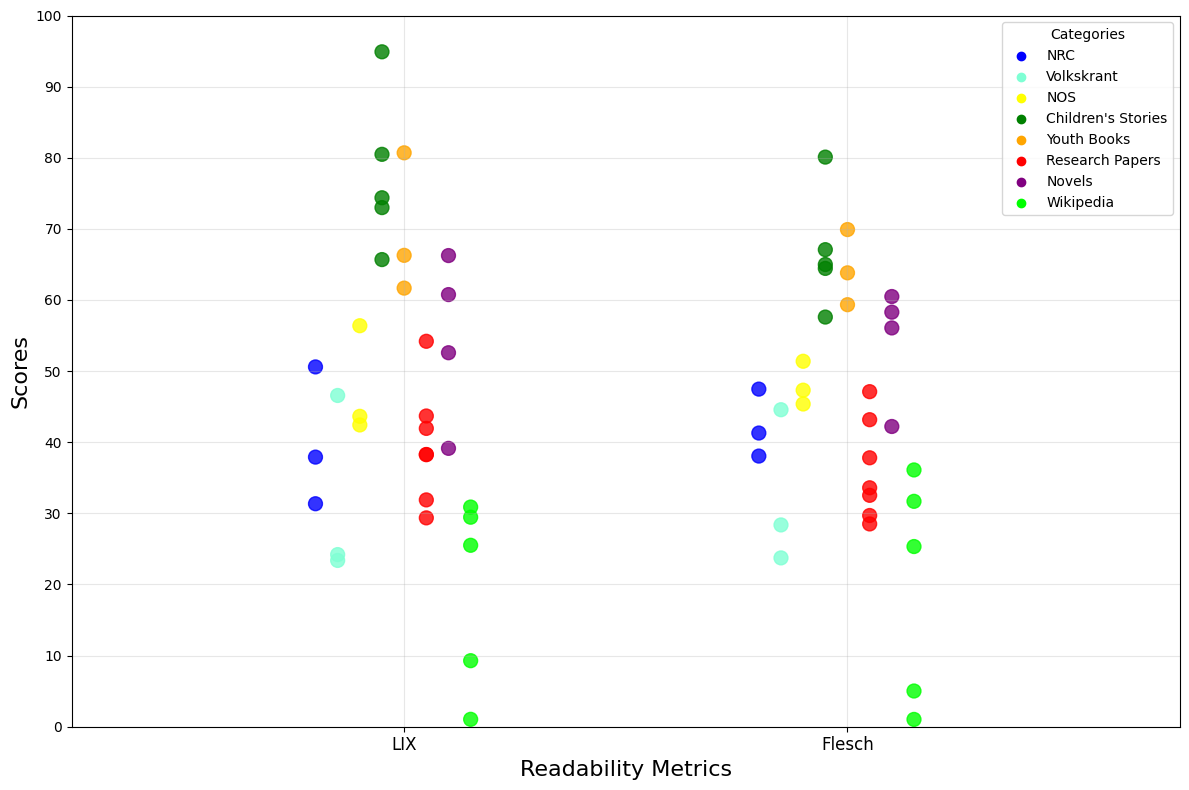

In [59]:
x_positions = {}
central_positions = {'lix': 0.3, 'flesch': 0.7}
offset_step = 0.02

# Assign x positions with offsets
for i, category in enumerate(categories.keys()):
    offset = (i - len(categories) // 2) * offset_step
    x_positions[category] = {
        'lix': central_positions['lix'] + offset,
        'flesch': central_positions['flesch'] + offset
    }

# Prepare the scatter plot data
scores = []
x_pos = []
colors_flat = []

for category, scores_dict in categories.items():
    for score in scores_dict['lix']:
        scores.append(score)
        x_pos.append(x_positions[category]['lix'])
        colors_flat.append(colors[category])
    for score in scores_dict['flesch']:
        scores.append(score)
        x_pos.append(x_positions[category]['flesch'])
        colors_flat.append(colors[category])

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_pos, scores, c=colors_flat, s=100, alpha=0.8)

# Add a legend for colors
for category, color in colors.items():
    plt.scatter([], [], color=color, label=category)
plt.legend(title="Categories", loc="upper right")

# Customize x-axis and y-axis
plt.xlim(0, 1)
plt.xticks([0.3, 0.7], ['LIX', 'Flesch'], size=12)
plt.yticks(range(0, 101, 10))
plt.ylim(0, 100)
plt.xlabel('Readability Metrics', size=16)
plt.ylabel('Scores', size=16)
# plt.title('Comparison of LIX and Flesch Scores', size=24)

# Add grid
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()
